<a href="https://colab.research.google.com/github/gabyxsantos/Economia/blob/Anny-arquivos/atualizandodf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --force-reinstall numpy
!pip install "pandas>=2.0,<2.3" --upgrade
!pip install babypandas --no-deps
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 327.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 82.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependen

In [2]:
import numpy as np
import babypandas as bpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**TABELAS:**

In [3]:
#lendo e tratando tabela intenção de consumo das familias

url_consumo = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/inten%C3%A7aoconsumo.csv"
dados_intencao_consumo = pd.read_csv(url_consumo, sep=";")

dados_intencao_consumo = dados_intencao_consumo.rename(columns={
    "Intenção de consumo das famílias - total - - - Confederação Nacional do Comércio de Bens, Serviços e Turismo - CNC12_ICF12": "Intenção de consumo"
})
dados_intencao_consumo["Intenção de consumo"] = pd.to_numeric(dados_intencao_consumo["Intenção de consumo"].str.replace(",", "."))
dados_intencao_consumo["Intenção de consumo"] = dados_intencao_consumo["Intenção de consumo"].round(2)
dados_intencao_consumo = dados_intencao_consumo.drop(columns=["Unnamed: 2"])

# Fazendo um recorte por ano ao invés de mês/ano
dados_intencao_consumo['Ano'] = dados_intencao_consumo['Data'].astype(str).str[:4].astype(int)
dados_intencao_consumo = dados_intencao_consumo.groupby('Ano')['Intenção de consumo'].sum().reset_index()

#delimitando o df para anos entre 2014 e 2024
dados_intencao_consumo = dados_intencao_consumo[(dados_intencao_consumo['Ano'] > 2013) & (dados_intencao_consumo['Ano'] < 2025)]


dados_intencao_consumo

,Ano,Intenção de consumo
1,2014,1479.28
2,2015,1118.91
3,2016,880.11
4,2017,935.08
5,2018,1042.51
...,...,...
7,2020,953.36
8,2021,859.30
9,2022,984.71
10,2023,1194.52


In [4]:
#lendo e tratando tabela receita real
url_receita = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/receitareal.csv"
dados_receita_real = pd.read_csv(url_receita, sep=";")
dados_receita_real = dados_receita_real.rename(columns={
    "Receita real - serviços - índice dessazonalizado (média 2022 = 100) - - - Instituto Brasileiro de Geografia e Estatística, Pesquisa Mensal de Serviços (IBGE/PMS) - PMS12_RRSSA12": "Receita real"
})
dados_receita_real["Receita real"] = pd.to_numeric(dados_receita_real["Receita real"].str.replace(",", "."))
dados_receita_real["Receita real"] = dados_receita_real["Receita real"].round(2)
dados_receita_real = dados_receita_real.drop(columns=["Unnamed: 2"])

# Fazendo um recorte por ano ao invés de mês/ano
dados_receita_real['Ano'] = dados_receita_real['Data'].astype(str).str[:4].astype(int)
dados_receita_real = dados_receita_real.groupby('Ano')['Receita real'].sum().reset_index()

#delimitando o df para anos entre 2012 e 2024
dados_receita_real = dados_receita_real[(dados_receita_real['Ano'] > 2013) & (dados_receita_real['Ano'] < 2025)]
dados_receita_real

,Ano,Receita real
3,2014,1207.28
4,2015,1163.97
5,2016,1104.57
6,2017,1074.69
7,2018,1073.24
...,...,...
9,2020,998.14
10,2021,1108.28
11,2022,1200.29
12,2023,1235.72


In [5]:
url_saude = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/consumosaude.csv"
dados_saude = pd.read_csv(url_saude, sep=";")
dados_saude = dados_saude.rename(columns={
    "Consumo aparente - produtos farmoquímicos e farmacêuticos - índice real dessazonalizado (média 2012 = 100) - - - Instituto de Pesquisa Econômica Aplicada - GAC12_CAFARMDESSAZ12": "Consumo relacionado a saúde"
})
dados_saude["Consumo relacionado a saúde"] = pd.to_numeric(dados_saude["Consumo relacionado a saúde"].str.replace(",", "."))
dados_saude["Consumo relacionado a saúde"] = dados_saude["Consumo relacionado a saúde"].round(2)
dados_saude = dados_saude.drop(columns=["Unnamed: 2"])

# Fazendo um recorte por ano ao invés de mês/ano
dados_saude['Ano'] = dados_saude['Data'].astype(str).str[:4].astype(int)
dados_saude = dados_saude.groupby('Ano')['Consumo relacionado a saúde'].sum().reset_index()

#delimitando o df para anos entre 2012 e 2024
dados_saude = dados_saude[(dados_saude['Ano'] > 1999) & (dados_saude['Ano'] < 2025)]
dados_saude

,Ano,Consumo relacionado a saúde
2,2000,702.98
3,2001,730.68
4,2002,800.49
5,2003,732.17
6,2004,759.00
...,...,...
22,2020,1235.79
23,2021,1459.98
24,2022,1408.71
25,2023,1409.95


In [6]:
PIB=pd.read_excel("https://github.com/gabyxsantos/Economia/raw/refs/heads/main/PIB.xls")

# Pega a transposta
PIB=PIB.T
colunas_para_remover=PIB.columns[[0,2,3]]
# Remove colunas desnecessárias
PIB=PIB.drop(colunas_para_remover,axis=1)
PIB=PIB.reset_index()
# Renomeia as colunas com o valor da primeira linha
for i in range(0, PIB.shape[1]):
    PIB.rename(columns={PIB.columns[i]: PIB.iloc[0, i]}, inplace=True)
PIB = PIB.drop(0)
PIB=PIB.rename(columns={'Real GDP growth (Annual percent change)':'Ano','Brazil':'Cresc_PIB'})
PIB

,Ano,Cresc_PIB
1,1980,9.2
2,1981,-4.4
3,1982,0.6
4,1983,-3.4
5,1984,5.3
...,...,...
47,2026,2.0
48,2027,2.2
49,2028,2.3
50,2029,2.4


In [7]:
PIB_PC=pd.read_excel("https://raw.githubusercontent.com/gabyxsantos/Economia/modificacoes-matheus/PIB_PC.xls", engine="xlrd")

# Pega a transposta
PIB_PC=PIB_PC.T
colunas_para_remover=PIB_PC.columns[[0,2,3]]
# Remove colunas desnecessárias
PIB_PC=PIB_PC.drop(colunas_para_remover,axis=1)
PIB_PC=PIB_PC.reset_index()
# Renomeia as colunas com o valor da primeira linha
for i in range(0, PIB_PC.shape[1]):
    PIB_PC.rename(columns={PIB_PC.columns[i]: PIB_PC.iloc[0, i]}, inplace=True)
PIB_PC = PIB_PC.drop(0)
PIB_PC=PIB_PC.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)':'Ano','Brazil':'PIB Per Capita (U$)'})
PIB_PC

,Ano,PIB Per Capita (U$)
1,1980,1229.883
2,1981,1382.548
3,1982,1446.228
4,1983,1134.932
5,1984,1105.852
...,...,...
47,2026,10215.584
48,2027,10697.469
49,2028,11208.539
50,2029,11774.535


In [8]:
Inflacao=pd.read_excel("https://raw.githubusercontent.com/gabyxsantos/Economia/modificacoes-matheus/Inflacao_Brasil.xls", engine="xlrd")

# Pega a transposta
Inflacao=Inflacao.T
colunas_para_remover=Inflacao.columns[[0,2,3]]
# Remove colunas desnecessárias
Inflacao=Inflacao.drop(colunas_para_remover,axis=1)
Inflacao=Inflacao.reset_index()
# Renomeia as colunas com o valor da primeira linha
for i in range(0, Inflacao.shape[1]):
    Inflacao.rename(columns={Inflacao.columns[i]: Inflacao.iloc[0, i]}, inplace=True)
Inflacao = Inflacao.drop(0)
Inflacao=Inflacao.rename(columns={'Inflation rate, end of period consumer prices (Annual percent change)':'Ano','Brazil':'Inflação (%)'})
Inflacao=Inflacao[(Inflacao['Ano']>2013) & (Inflacao['Ano']<2025)]
Inflacao

,Ano,Inflação (%)
35,2014,6.4
36,2015,10.7
37,2016,6.3
38,2017,2.9
39,2018,3.7
...,...,...
41,2020,4.5
42,2021,10.1
43,2022,5.8
44,2023,4.6


In [9]:
url = "https://raw.githubusercontent.com/gabyxsantos/Economia/main/projecoes_2024_tab4_indicadores.xlsx"
dados = pd.read_excel(url)
dados = dados[(dados[dados.columns[0]].notna()) & (dados[dados.columns[1]].notna()) & (dados[dados.columns[2]].notna())]

#Retirando linhas nulas
for i in range(0, dados.shape[1]):
    dados.rename(columns={dados.columns[i]: dados.iloc[0, i]}, inplace=True)
dados = dados.reset_index(drop = True).drop(0)

dados

,ANO,CÓD.,SIGLA,LOCAL,POP_T,POP_H,POP_M,TCG_T,TCG_H,TCG_M,...,RDI60,RDT60,RDJ65,RDI65,RDT65,IE60,IE65,IE80,ID_M,ID_MED
1,2000,0,BR,Brasil,174695935,85720706,88975229,NaN,NaN,NaN,...,14.206208,62.953355,46.698707,9.407064,56.105772,29.142644,20.144164,3.888745,28.314517,25.286941
2,2001,0,BR,Brasil,177003743,86821427,90182316,1.321043,1.284078,1.356655,...,14.307632,61.839348,45.530672,9.495381,55.026053,30.101231,20.85491,4.035052,28.572942,25.595223
3,2002,0,BR,Brasil,179228254,87882321,91345933,1.256759,1.221926,1.290294,...,14.419914,60.766364,44.393946,9.599581,53.993527,31.113308,21.623625,4.205821,28.845196,25.923454
4,2003,0,BR,Brasil,181377654,88907299,92470355,1.199253,1.166307,1.230949,...,14.550357,59.763442,43.304364,9.714486,53.01885,32.181739,22.433041,4.396686,29.128255,26.278205
5,2004,0,BR,Brasil,183469593,89905311,93564282,1.153361,1.122531,1.183003,...,14.711434,58.851646,42.26421,9.836084,52.100294,33.328869,23.272845,4.606715,29.420245,26.650273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,2066,53,DF,Distrito Federal,2833335,1349784,1483551,-0.768785,-0.712703,-0.819755,...,78.880664,101.272634,19.581355,56.427767,76.009122,352.272107,288.170893,110.644515,49.393802,52.236564
2340,2067,53,DF,Distrito Federal,2810837,1339890,1470947,-0.794047,-0.733006,-0.849583,...,80.019301,102.432573,19.588116,57.328164,76.916279,357.017496,292.668091,113.348328,49.557541,52.511818
2341,2068,53,DF,Distrito Federal,2787832,1329808,1458024,-0.818439,-0.75245,-0.87855,...,81.100627,103.550669,19.610389,58.193637,77.804026,361.249333,296.749015,115.608373,49.708977,52.782436
2342,2069,53,DF,Distrito Federal,2764372,1319558,1444814,-0.841514,-0.770788,-0.906021,...,82.166193,104.675965,19.651429,59.034309,78.685738,365.024554,300.407211,117.42424,49.84825,53.040354


In [10]:
#Renomeando colunas
dados=dados.rename(columns={'RS': 'RAZAO_SEXO', 'ID_M': 'MED_IDADE', 'ID_MED': 'MEDN_IDADE', 'TBN' : 'TXB_NATALID',
                      'TBM' :'TXB_MORTALID', 'TCV': 'TX_CRESC_VEGET', 'IE60' : 'INDC_60+', 'IE65' : 'INDC_65+',
                      'IE80' : 'INDC_80+', 'RDJ60': 'RZ_DPND_J60', 'RDI60' : 'RZ_DPND_I60' , 'RDT60' : 'RZ_DPND_60_T',
                      'RDJ65': 'RZ_DPND_J65', 'RDI65' : 'RZ_DPND_I6+', 'RDT65' : 'RZ_DPND_T65','TFT' : 'TX_FCUND_T',
                      'TEF_10-14' : 'TX_FCUND_10E14', 'TEF_15-19': 'TX_FCUND_15E19', 'TEF_20-24' : 'TX_FCUND_20E24', 'TEF_25-29' : 'TX_FCUND_25E29',
                      'TEF_30-34' : 'TX_FCUND_30E34', 'TEF_35-39': 'TX_FCUND_35E39', 'TEF_40-44': 'TX_FCUND_40E44', 'TEF_45-49': 'TX_FCUND_45E49',
                      'TEF_50+': 'TX_FCUND_50+'})

col = ['TCG_','e0_', 'e60_', '5q0_', '45q15_', '20q60_', 'TMI_']
col_nova = ['TX_CRES_GEOM_','ESP_VIDA_O_' , 'ESP_VIDA_6O_' , 'PROB_MORTE_OE5_' , 'PROB_MORTE_15E45_', 'PROB_MORTE_60E80_', 'TX_MORT_INFANTIL_']

for i in range(0, dados.shape[1]):
    nome_col = str(dados.columns[i])

    for j in range(0,7):
        if(col[j] in nome_col):
         nome_col = nome_col.replace(col[j], col_nova[j])

    if(nome_col != str(dados.columns[i])):
        dados = dados.rename(columns= {str(dados.columns[i]):nome_col})

dados.columns

Index(['ANO', 'CÓD.', 'SIGLA', 'LOCAL', 'POP_T', 'POP_H', 'POP_M',
       'TX_CRES_GEOM_T', 'TX_CRES_GEOM_H', 'TX_CRES_GEOM_M', 'RAZAO_SEXO',
       'NASC_T', 'NASC_H', 'NASC_M', 'OBT_T', 'OBT_H', 'OBT_M', 'TXB_NATALID',
       'TXB_MORTALID', 'TX_CRESC_VEGET', 'ESP_VIDA_O_T', 'ESP_VIDA_O_H',
       'ESP_VIDA_O_M', 'ESP_VIDA_6O_T', 'ESP_VIDA_6O_H', 'ESP_VIDA_6O_M',
       'TX_MORT_INFANTIL_T', 'TX_MORT_INFANTIL_H', 'TX_MORT_INFANTIL_M',
       'PROB_MORTE_OE5_T', 'PROB_MORTE_OE5_H', 'PROB_MORTE_OE5_M',
       'PROB_MORTE_15E45_T', 'PROB_MORTE_15E45_H', 'PROB_MORTE_15E45_M',
       'PROB_MORTE_60E80_T', 'PROB_MORTE_60E80_H', 'PROB_MORTE_60E80_M',
       'TX_FCUND_T', 'TX_FCUND_10E14', 'TX_FCUND_15E19', 'TX_FCUND_20E24',
       'TX_FCUND_25E29', 'TX_FCUND_30E34', 'TX_FCUND_35E39', 'TX_FCUND_40E44',
       'TX_FCUND_45E49', 'TX_FCUND_50+', 'RZ_DPND_J60', 'RZ_DPND_I60',
       'RZ_DPND_60_T', 'RZ_DPND_J65', 'RZ_DPND_I6+', 'RZ_DPND_T65', 'INDC_60+',
       'INDC_65+', 'INDC_80+', 'MED_IDADE

In [11]:
id_locais = dados.iloc[:, :4] #ANO, COD, SIGLA, LOCAL

#Recorte dos dados

#Indicadores gerais com recorte de gênero
# [POP_*, NASC_*, OBT_*, TX_CRES_VEGET_*, ESP_VIDA_O_*, ESP_VIDA_6O_*, PROB_MORTE_OE5_*, PROB_MORTE_15E45_*, PROB_MORTE_60E80_*, TX_MORT_INFANTIL_*]
indicadores_femininos = id_locais
indicadores_masculinos = id_locais

for i in range(0, dados.shape[1]):
    if('_M' == dados.columns[i][-2:]):
       indicadores_femininos = pd.concat([indicadores_femininos, dados.iloc[:, i]], axis=1)
    if('_H' == dados.columns[i][-2:]):
       indicadores_masculinos = pd.concat([indicadores_masculinos, dados.iloc[:, i]], axis=1)

dados

,ANO,CÓD.,SIGLA,LOCAL,POP_T,POP_H,POP_M,TX_CRES_GEOM_T,TX_CRES_GEOM_H,TX_CRES_GEOM_M,...,RZ_DPND_I60,RZ_DPND_60_T,RZ_DPND_J65,RZ_DPND_I6+,RZ_DPND_T65,INDC_60+,INDC_65+,INDC_80+,MED_IDADE,MEDN_IDADE
1,2000,0,BR,Brasil,174695935,85720706,88975229,NaN,NaN,NaN,...,14.206208,62.953355,46.698707,9.407064,56.105772,29.142644,20.144164,3.888745,28.314517,25.286941
2,2001,0,BR,Brasil,177003743,86821427,90182316,1.321043,1.284078,1.356655,...,14.307632,61.839348,45.530672,9.495381,55.026053,30.101231,20.85491,4.035052,28.572942,25.595223
3,2002,0,BR,Brasil,179228254,87882321,91345933,1.256759,1.221926,1.290294,...,14.419914,60.766364,44.393946,9.599581,53.993527,31.113308,21.623625,4.205821,28.845196,25.923454
4,2003,0,BR,Brasil,181377654,88907299,92470355,1.199253,1.166307,1.230949,...,14.550357,59.763442,43.304364,9.714486,53.01885,32.181739,22.433041,4.396686,29.128255,26.278205
5,2004,0,BR,Brasil,183469593,89905311,93564282,1.153361,1.122531,1.183003,...,14.711434,58.851646,42.26421,9.836084,52.100294,33.328869,23.272845,4.606715,29.420245,26.650273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,2066,53,DF,Distrito Federal,2833335,1349784,1483551,-0.768785,-0.712703,-0.819755,...,78.880664,101.272634,19.581355,56.427767,76.009122,352.272107,288.170893,110.644515,49.393802,52.236564
2340,2067,53,DF,Distrito Federal,2810837,1339890,1470947,-0.794047,-0.733006,-0.849583,...,80.019301,102.432573,19.588116,57.328164,76.916279,357.017496,292.668091,113.348328,49.557541,52.511818
2341,2068,53,DF,Distrito Federal,2787832,1329808,1458024,-0.818439,-0.75245,-0.87855,...,81.100627,103.550669,19.610389,58.193637,77.804026,361.249333,296.749015,115.608373,49.708977,52.782436
2342,2069,53,DF,Distrito Federal,2764372,1319558,1444814,-0.841514,-0.770788,-0.906021,...,82.166193,104.675965,19.651429,59.034309,78.685738,365.024554,300.407211,117.42424,49.84825,53.040354


In [12]:
RMracaregiao = pd.read_csv('https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/Anny-arquivos/7441%20-%20PNAD%20-RendimentoMedioRa%C3%A7aRegiao%20-%202012-2023.csv',encoding='utf-8')
RMsexoregiao = pd.read_csv('https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/Anny-arquivos/7444%20-%20PNAD%20-%20RendimentoMedioSexoRegioes%20-%202012-2023.csv',encoding='utf-8')
txFecunidade_ano = dados[["ANO","TX_FCUND_T"]].set_index("ANO").T
txFecunidade_ano = txFecunidade_ano.iloc[:, 12:24].reset_index(drop=True)

RendaMedia_sexo = RMsexoregiao[RMsexoregiao["Brasil e Grande Região"] == "Brasil"]
RendaMedia_Brasil = RendaMedia_sexo[(RendaMedia_sexo["Sexo"] == "Total")].iloc[:, 2:].reset_index(drop=True)
RendaMedia_Mulher = RendaMedia_sexo[(RendaMedia_sexo["Sexo"] == "Mulheres")].iloc[:, 2:].reset_index(drop=True)
RendaMedia_Homem = RendaMedia_sexo[(RendaMedia_sexo["Sexo"] == "Homens")].iloc[:, 2:].reset_index(drop=True)
RendaMedia_raca = RMracaregiao[RMracaregiao["Brasil e Grande Regiao"] == "Brasil"]
RendaMedia_Branca = RendaMedia_raca[RendaMedia_raca["Cor ou raca"] == "Branca"].iloc[:, 2:].reset_index(drop=True)
RendaMedia_Negra = (RendaMedia_raca[RendaMedia_raca["Cor ou raca"] == "Preta"].iloc[0, 2:] + RendaMedia_raca[RendaMedia_raca["Cor ou raca"] == "Parda"].iloc[0, 2:]) / 2

In [13]:
#Censo 2010
#Numero de Filho por Mulher
renda_mulher_filhos_censo10 = pd.read_csv('https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/Anny-arquivos/censo2010_tabfec1_2_20.csv', skiprows=7, nrows=9)
renda_mulher_filhos_censo10.columns = [ "classes de rendimento mensal domiciliar pc(salário mínimo)",  "Total", "1 filho", "2 filhos", "3 filhos", "4 filhos", "5 filhos", "6 ou mais filhos", " " ]

#Renda por mulher
renda_mulher_filhos_censo10 = renda_mulher_filhos_censo10.iloc[:, :8]
renda_mulher_censo10 = pd.read_csv('https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/Anny-arquivos/censo2010_tabfam1_3_5.csv', skiprows=31, nrows=13)
renda_mulher_censo10.columns = ["classes de rendimento mensal domiciliar pc(salário mínimo)",  "Total", "Branca", "Preta", "Amarela", "Parda", "Indigena", "Sem Declaracao"]
df_mr = renda_mulher_censo10.set_index("classes de rendimento mensal domiciliar pc(salário mínimo)").iloc[0:,:1].T
MulherRenda = pd.DataFrame()
MulherRenda = df_mr[df_mr.columns[1:7]]
MulherRenda = pd.concat([MulherRenda, df_mr[df_mr.columns[6:11]].sum(axis=1)], axis = 1)
MulherRenda.rename(columns={0: 'Mais de 5'}, inplace=True)
MulherRenda[df_mr.columns[12]] = df_mr[df_mr.columns[12]]

# **ANÁLISES GERAIS**

# **Como o crescimento do PIB se relaciona com a intenção de consumo?**




In [14]:
# Funções importantes para a análise:

def padronizar(numeros):
    #Converte valores para unidades padrão. Será necessário para o cálculo do coeficiente de correlação de Pearson (r)
    return (numeros - numeros.mean()) / np.std(numeros)

def calcular_r(df,x,y):
    #Retorna o valor do r
    x_su = padronizar(df.get(x))
    y_su = padronizar(df.get(y))
    return (x_su * y_su).mean()

def inclinacao(df, x, y):
    #Retorna a inclinação da linha de regressão entre as colunas x e y do dataframe (em unidades originais)
    r = calcular_r(df, x, y)
    return r * np.std(df.get(y)) / np.std(df.get(x))

def intercepto(df, x, y):
    #Retorna o intercepto da linha de regressão entre as colunas x e y do dataframe (em unidades originais)
    return df.get(y).mean() - inclinacao(df, x, y) * df.get(x).mean()

def valor_predito(x):
    #Retorna o valor predito para um determinado ponto x do gráfico
    return a*x+b

def plotar_erro(df, x_col, y_col):
    # Calcula coeficientes da regressão
    a = inclinacao(df, x_col, y_col)
    b = intercepto(df, x_col, y_col)

    # Valores reais
    x = df.get(x_col)
    y = df.get(y_col)

    # Valores preditos
    y_pred = a * x + b

    # Cria o gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Valores reais')
    plt.plot(x, y_pred, color='red', label='Reta de regressão')

    # Erros (resíduos)
    for xi, yi, ypi in zip(x, y, y_pred):
        plt.plot([xi, xi], [yi, ypi], color='gray', linestyle='--')

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Erros em relação à reta de regressão: {y_col} vs {x_col}')
    plt.legend()
    plt.grid(True)
    plt.show()

###A análise da influência do crescimento da atividade econômica sobre a intenção de consumo das famílias, empiricamente, parece fazer sentido, dado que uma economia aquecida, geralmente, acompanha a expansão do mercado consumidor interno. Com essa perspectiva, podemos intuir algumas hipóteses:


##Hipóteses:

Historicamente, segundo análise de cientistas políticos, os governos brasileiros tendem a estimular o crescimento econômico aumentando o incentivo ao consumo - isto pode se dar por meio de programas de transferência de renda ou políticas de valorização da remuneração, como o aumento do salário mínimo acima da inflação - ao custo da agenda fiscal. Sob esse viés, fazemos as seguintes suposições:
*   O indicador econômico Consumo das Famílias é positivamente influenciado pela adoção de medidas governamentais
*   A série histórica (normalizada com relação a 2022) de Intenção de Consumo, de caráter potencial, se reflete significativamente em caráter real, isto é, é um mecanismo confiável, que antevê padrões quantitativos de consumo da população.

##Expectativas:


*  Espera-se correlação positiva e forte entre os indicadores `Crescimento do PIB` e `Intenção de Consumo`, o que fortaleceria a ideia de que **o aquecimento da atividade econômica no país é explicado, em grande parte, por uma tradução da perspectiva de consumo das famílias em consumo real**.

##Contextualizando

Eis a série histórica do crescimento anual percentual do Produto Interno Bruto (PIB) brasileiro junto da Intenção de Consumo das famílias, com suas respectivas escalas. O recorte temporal abrange eventos importantes na história econômica nacional, como a Crise do biênio 2015-2016 e a Pandemia de COVID-19 (2020-2022) - intervalos destacados em amarelo no gráfico -, ambos com ligeiro impacto na atividade econômica, no poder de compra do brasileiro médio e em suas perspectivas de consumo.

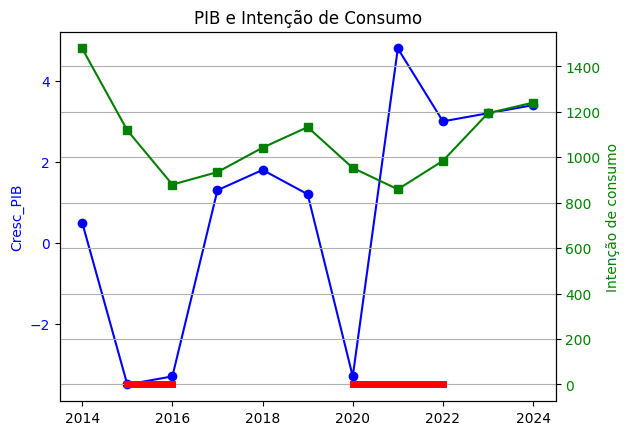

In [15]:
# Eventos de destaque
Crise_Nacional=[2015,2016]
Pandemia_COVID=[2020,2022]
Eventos=[Crise_Nacional,Pandemia_COVID]

PIB_Consumo=PIB.merge(
    dados_intencao_consumo,
    on='Ano'
)
PIB_Consumo=PIB_Consumo.set_index('Ano')

# Criar a figura e o primeiro eixo
fig, ax1 = plt.subplots()

# Plotar a primeira série no eixo Y da esquerda
ax1.plot(PIB_Consumo.index, PIB_Consumo['Cresc_PIB'], color='blue', marker='o', label='Vendas')
ax1.set_ylabel('Cresc_PIB', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o segundo eixo Y (à direita)
ax2 = ax1.twinx()
ax2.plot(PIB_Consumo.index, PIB_Consumo['Intenção de consumo'], color='green', marker='s', label='Lucro')
ax2.set_ylabel('Intenção de consumo', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Título e layout
plt.title('PIB e Intenção de Consumo')
for i in Eventos:
    plt.plot(i, [0, 0], color='red', linewidth=5, zorder=2);
plt.grid(True)
plt.show()

###Visualmente, podemos verificar que as curvas de intenção de consumo e crescimento do PIB aparentam ser influenciadas - ainda que em graus distintos - pelas mesmas variáveis. Sob esse prisma, observamos uma tendência interessante no gráfico: **o desempenho percentual negativo da economia sempre ocorre junto de redução nas expectativas de consumo das famílias**. Isso pode estar relacionado a como a sensação de piora econômica acarreta limitação nas perspectivas de consumo futuro.

####Ademais, pode-se observar que, diferentemente do que se viu durante a crise econômica de 2015-16, *a intenção de consumo permaneceu em trajetória descendente em 2021, ainda que a atividade econômica tenha apresentado melhora considerável* - expansão de 4,8%, o melhor desempenho desde 2010 (7,5%), quando o país se recuperava da Crise Imobiliária Internacional de 2008.

####A nuance comportamental desse indicador econômico pode ser explicada pelas particularidades do período vivido no momento mais recente. Ao contrário da crise anterior, movida pelo fracasso da política econômica doméstica, esta tinha causa totalmente externa a alguma eventual falha dos mecanismos de regulação dos ciclos econômicos, e foi respondida pelo governo com extensos pacotes de estímulo - a exemplo do auxílio emergencial. O impacto de tal medida é amplo, mas pode ser considerado na inflação, que atingiu um máximo em 2021, e pode ter sido uma das causas relevantes para que a confiança das famílias no consumo futuro fosse prejudicada.

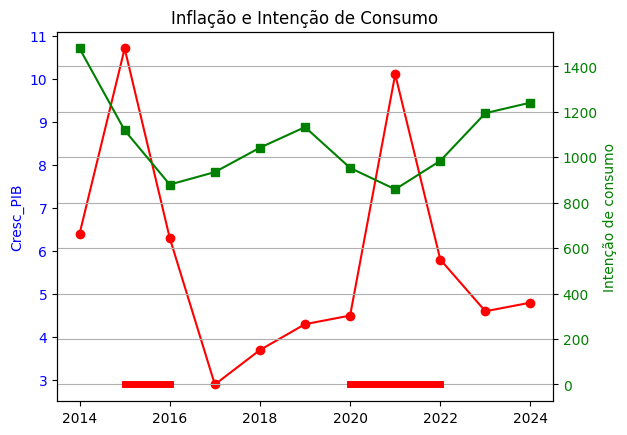

In [16]:
Inflacao_Consumo=Inflacao.merge(
    dados_intencao_consumo,
    on='Ano'
)
Inflacao_Consumo=Inflacao_Consumo.set_index('Ano')

# Criar a figura e o primeiro eixo
fig, ax1 = plt.subplots()

# Plotar a primeira série no eixo Y da esquerda
ax1.plot(Inflacao_Consumo.index, Inflacao_Consumo['Inflação (%)'], color='red', marker='o', label='Vendas')
ax1.set_ylabel('Cresc_PIB', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o segundo eixo Y (à direita)
ax2 = ax1.twinx()
ax2.plot(Inflacao_Consumo.index, Inflacao_Consumo['Intenção de consumo'], color='green', marker='s', label='Lucro')
ax2.set_ylabel('Intenção de consumo', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Título e layout
plt.title('Inflação e Intenção de Consumo')
for i in Eventos:
    plt.plot(i, [0, 0], color='red', linewidth=5, zorder=2);
plt.grid(True)
plt.show()

###Acima, visualizamos como 2021 foi um ano marcado por inflação próxima de dois dígitos, ao mesmo tempo em que as expectivas de consumo atingiram seu menor valor na série temporal analisada. Essa percepção nos obriga a reformular a hipótese de que o crescimento do PIB por si só seja capaz de ditar o consumo das famílias ou vice-versa. Desse modo, é possível que haja outros fatores importantes envolvidos, de tal maneira que a correlação entre expansão da atividade econômica e a intenção de consumo da população não seja forte o bastante para se supor causalidade.

####Feitas as análises empíricas, podemos verificar se a hipótese corrobora com a configuração dos dados através de um gráfico de dispersão:

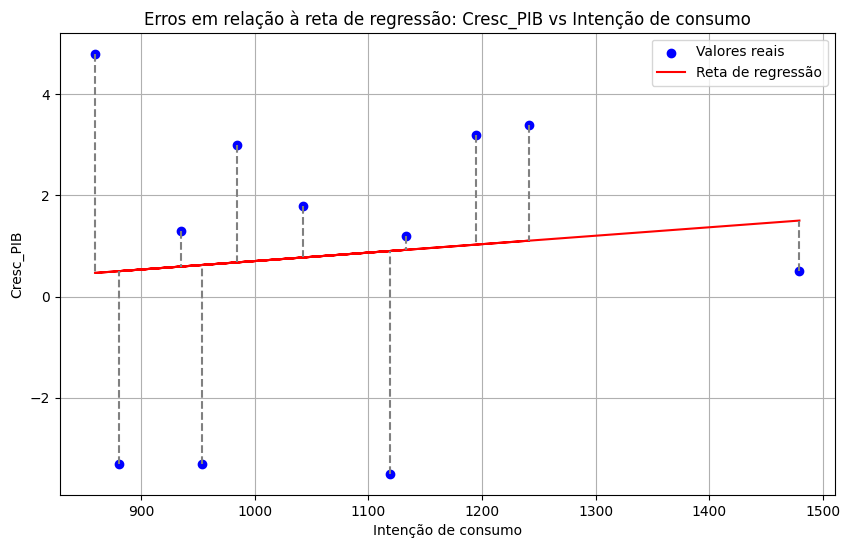

In [17]:
plotar_erro(PIB_Consumo,'Intenção de consumo','Cresc_PIB')

####Intuitivamente, nota-se como a inclinação da reta de regressão, com os valores esperados da interação entre os dois indicadores, é próxima de 0, com erros notáveis entre a reta e quase todos os dados reais. Isso indica que a dita correlação, conforme esperávamos, não é significante. Para confirmar tal observação, calcula-se o *Coeficiente de Pearson*:

In [18]:
coef_r=float(calcular_r(PIB_Consumo,'Intenção de consumo','Cresc_PIB'))
coef_r

0.10419626589518947

# Conclusões:

###Com um r de ~0,104, podemos confirmar que a correlação entre os indicadores `Crescimento do PIB` e `Intenção de Consumo` é fraca ou inexistente (<0,3). O resultado corrobora a ideia de que o crescimento da economia, por si só, não é capaz de explicar as variações nas perspectivas de consumo do cidadão médio brasileiro.

###Diante disso, poderíamos supor que a quase inexistente correlação se deve a um panorama em que o crescimento econômico não é distribuído de forma homogênea na população brasileira, ideia defendida por diversos economistas e cientistas políticos, entre eles, Marcio Porchmann (Unicamp).

#**PIB Per Capita e Intenção de Consumo**

###Dado que constatamos que o crescimento percentual do PIB não é capaz de explicar, de maneira considerável, a intenção de consumo das famílias, intuimos que a distribuição da riqueza gerada no país é heterogênea, possivelmente se concentrando em camadas mais abastadas, o que poderia justificar a baixa correlação entre expansão econômica e previsões de consumo de curto e médio prazo.
Sob esse pensamento, surge outro questionamento: *O PIB Per Capita explica períodos de maior e menor intenção de consumo da população?*

Tal indagação se fundamenta no fato de que, diferentemente do crescimento percentual do PIB nacional, o PIB Per Capita carrega informações mais precisas e robustas sobre a produção de riqueza a nível individual, o que nos permite averiguar o quão rica é a população de um país. Desse modo, podemos nos perguntar se, quanto maior a riqueza média do brasileiro, maior será sua intenção em consumir.
Abaixo, temos um gráfico com o PIB Per Capita (em dólares internacionais) e o índice de Intenção de Consumo, cada variável em sua respectiva escala.

##Hipóteses:

Sob essa ótica, reformulamos algumas novas suposições e mantemos outras:

*  A série histórica (normalizada com relação a 2022) de Intenção de Consumo, de caráter potencial, se reflete significativamente em caráter real, isto é, é um mecanismo confiável, que antevê padrões quantitativos de consumo da população.
*  O PIB Per Capita, além de eficaz em mensurar a riqueza per capita de um país, exerce influencia no poder de compra - ou seja, é ferramenta capaz de estimar a renda potencial, o potencial de consumo e o padrão de vida médio da população.


##Expectativas:


*  Espera-se correlação forte (>0,5) e positiva entre o PIB Per Capita e a Intenção de Consumo das famílias, demonstrando que **consumidores tomam decisões de consumo com base em sua renda disponível**.

##Contextualizando

Segue a série temporal (2014-2024) do PIB Per Capita (em dólares internacionais) e o índice de Intenção de Consumo, com cada variável em sua respectiva escala. Eventos outrora considerados relevantes para o panorama socioeconômico, como a Crise de 2015-16 e a Pandemia de COVID-19 foram novamente considerados - intervalos destacados em amarelo no gráfico.

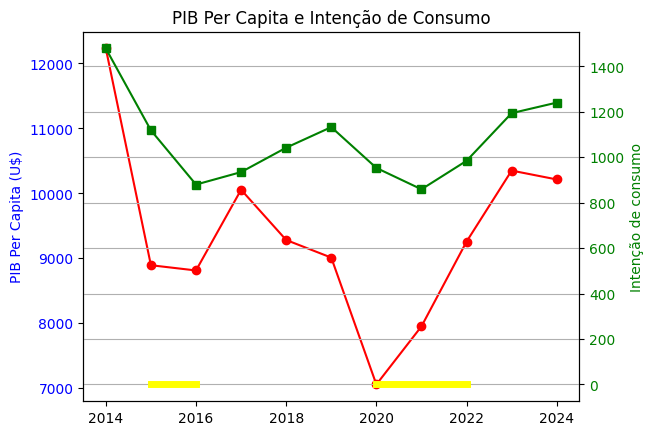

In [19]:
PC_Consumo=PIB_PC.merge(
    dados_intencao_consumo,
    on='Ano'
)
PC_Consumo=PC_Consumo.set_index('Ano')

# Criar a figura e o primeiro eixo
fig, ax1 = plt.subplots()

# Plotar a primeira série no eixo Y da esquerda
ax1.plot(PC_Consumo.index, PC_Consumo['PIB Per Capita (U$)'], color='red', marker='o', label='Vendas')
ax1.set_ylabel('PIB Per Capita (U$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o segundo eixo Y (à direita)
ax2 = ax1.twinx()
ax2.plot(PC_Consumo.index, PC_Consumo['Intenção de consumo'], color='green', marker='s', label='Lucro')
ax2.set_ylabel('Intenção de consumo', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Título e layout
plt.title('PIB Per Capita e Intenção de Consumo')
for i in Eventos:
    plt.plot(i, [0, 0], color='yellow', linewidth=5, zorder=2);
plt.grid(True)
plt.show()

###Podemos visualizar uma proximidade comportamental maior entre os dois indicadores se comparados aos anteriores (Crescimento do PIB e Intenção de Consumo). Sobre isso, são feitas algumas observações:

####É relativamente fácil observar que **recuos no PIB Per Capita** - que refletem tanto a redução na atividade econômica quanto uma possível variação positiva da taxa de câmbio - **quase sempre são acompanhados de decremento nas perspectivas de consumo**. Apesar disso, há momentos em que as curvas tomam tendências distintas, como no biênio 2018-19 e nos anos de 2021 e 2024. Isso pode ser explicado sumariamente pelo fator cambial - isto é, o aumento do preço do dólar, seja por incerteza especulativa ou política doméstica, desvaloriza o real e, por consequência, o PIB Per Capita.
####Com base nestas constatações, mantemos confiança numa possível correlação forte e positiva entre PIB Per Capita e Intenção de Consumo da população. Para confirmar nossas suspeitas, plotamos um gráfico de dispersão com as variáveis de interesse:

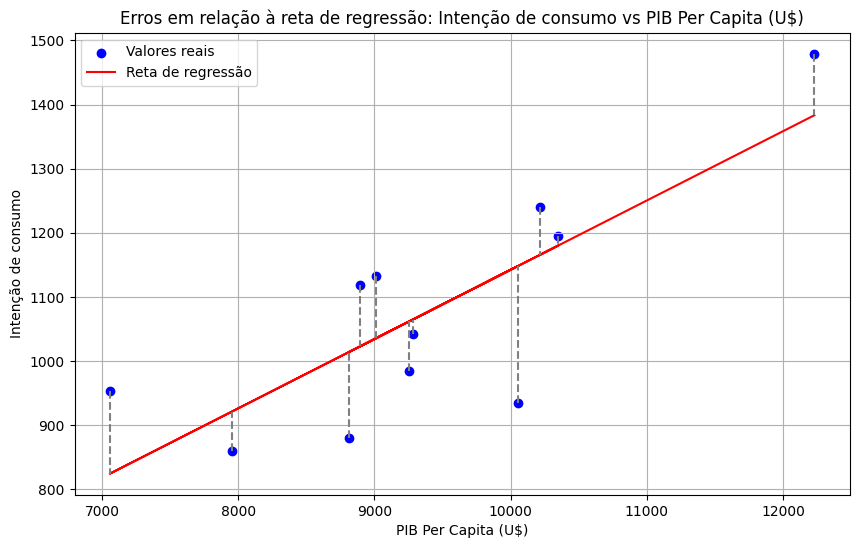

In [20]:
plotar_erro(PC_Consumo,'PIB Per Capita (U$)','Intenção de consumo')

####Com relação à extensão da reta de regressão em nosso recorte intervalar de USD 7.000,00 a USD 13.000,00, erros ligeiramente menores do que os do gráfico de correlação anterior são notórios, e a inclinação da reta se aproxima de uma diagonal, o que evidencia acerto de nossa hipótese inicial - correlação forte e positiva. Para atestar o dito, calculamos o *Coeficiente de Pearson*:

In [21]:
coef_r=float(calcular_r(PC_Consumo,'PIB Per Capita (U$)','Intenção de consumo'))
coef_r

0.795738986100699

# Conclusões:

###Um r de ~0,795 é suficiente para afirmar que há forte correlação positiva entre o PIB Per Capita e a Intenção de Consumo das famílias brasileiras.

###Apesar do resultado não ser suficiente para ratificar uma causalidade, é importante fundamento à noção de alguns cientistas e analistas econômicos de que, sozinha, a expansão da atividade econômica não é capaz de impulsionar o consumo dos indivíduos no país, e é frágil justificar o crescimento do PIB - indicador tão multifacetado - pelo consumo das famílias. Por outro lado, há indicações favoráveis à ideia de que o aumento da renda acarreta maior predileção ao consumo de bens e serviços.

**Observação**

####Com respeito ao gráfico de correlação, note, também, como se assemelha a uma **Curva de Engel**, que descreve como a despesa das famílias num determinado bem ou serviço varia de acordo com o rendimento familiar. Nesse sentido, a reta de regressão apresenta inclinação ascendente (correlação forte e positiva), o que indica que os objetos de consumo das famílias são, predominantemente, caracterizados como Bens Normais - como roupa, comida e eletrodomésticos. Pode-se inferir, ademais, que Bens Inferiores - como alimentos básicos de baixo custo e transporte público - não são relevantes o suficiente na relação renda-consumo estudada, pois não impactam significativamente o comportamento da reta.

# Como a taxa de natalidade e de fecundidade estão evoluindo ao longo dos anos?

In [22]:
#Incidicadores gerais da população
#[POP_*, NASC_*, OBT_*, TX_CRESC_GEOM_*, RAZAO_SEXO, TX_CRESC_VEGETATIVO, TX_BRUTA_NATALIDADE, TX_BRUTA_MORTALIDADE, MEDIA_IDADE, MEDIANA_IDADE]
indices_populacionais = id_locais
indices_populacionais = pd.concat([indices_populacionais, dados.iloc[:, 4:20]], axis=1)
indices_populacionais = pd.concat([indices_populacionais, dados.iloc[:, 57:59]], axis=1)

#Estatísticas de mortalidade
# [ESP_VIDA_O_*, ESP_VIDA_6O_*, PROB_MORTE_OE5_*, PROB_MORTE_15E45_*, PROB_MORTE60E80_*, TX_OBITO_INFANTIL_*]
mortalidade_est = id_locais
mortalidade_est = pd.concat([mortalidade_est, dados.iloc[:, 20:37]], axis=1)

#Estatísticas fecundidade
#[TX_FCUND_T , TX_FCUND_10E14, TX_FCUND_15E19, TX_FCUND_20E24, TX_FCUND_25E29, TX_FCUND_30E34, TX_FCUND_35E39, TX_FCUND_40E44, TX_FCUND_45E49, TX_FCUND_50+]
fecundidade_est = id_locais
fecundidade_est = pd.concat([fecundidade_est, dados.iloc[:, 38:48]], axis=1)

#Indice de Envelhecimento
# [INDICE_60+, INDICE_65+, INDICE_80+]
envelhecimento = id_locais
envelhecimento = pd.concat([envelhecimento, dados.iloc[:, 54:57]], axis=1)

#Razao de dependencia
# [RZ_DEPEND_0E14_60, RZ_DEPEND_60+, RZ_DEPEND_TOTAL_0E60+, RZ_DEPEND_0E14_65,  RZ_DEPEND_65+,  RZ_DEPEND_TOTAL_65+]
razao_dependencia = id_locais
razao_dependencia = pd.concat([razao_dependencia, dados.iloc[:, 48:54]], axis=1)

In [23]:
tx_natal = dados.groupby('ANO')['TXB_NATALID'].mean()
tx_natal

,TXB_NATALID
ANO,
2000,23.02877
2001,21.566824
2002,20.670142
2003,20.256845
2004,19.523479
...,...
2066,7.643979
2067,7.613907
2068,7.58927


<Axes: title={'center': 'Evolução da taxa de natalidade'}, xlabel='ANO', ylabel='Média em milhões'>

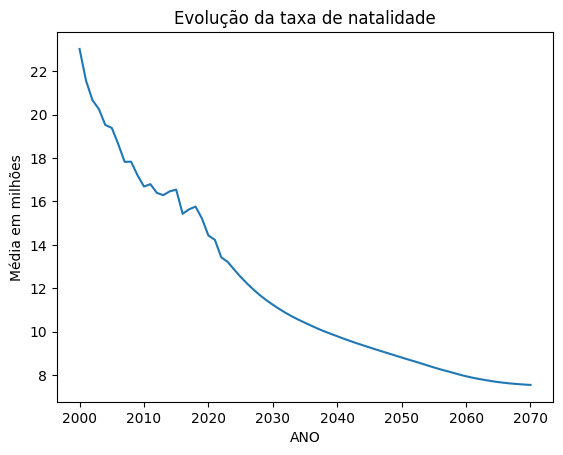

In [24]:
tx_natal.plot(kind="line", ylabel='Média em milhões', title='Evolução da taxa de natalidade')

<Axes: title={'center': 'Evolução da taxa de fecundidade'}, xlabel='ANO', ylabel='Média em milhões'>

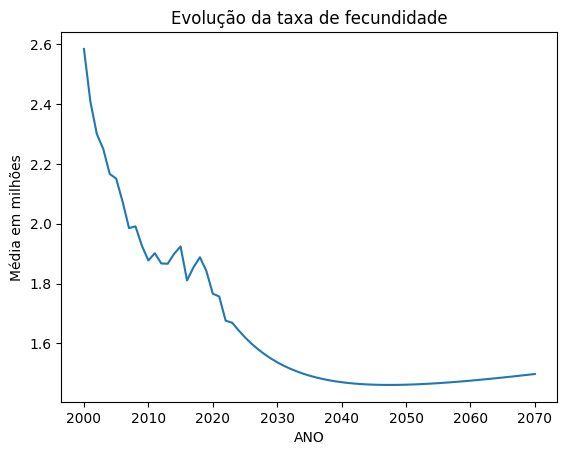

In [25]:
tx_fecundidade=fecundidade_est.groupby('ANO')['TX_FCUND_T'].mean()
tx_fecundidade.plot(kind="line", ylabel='Média em milhões', title='Evolução da taxa de fecundidade')

# Principais motivos para a diminuição da taxa de natalidade e de fecundidade no Brasil

1. Aumento da escolaridade (especialmente feminina).
  Mulheres com maior nível de instrução tendem a adiar a maternidade e ter menos filhos.

  Educação melhora o acesso à informação sobre saúde reprodutiva e planejamento familiar.

2. Maior participação das mulheres no mercado de trabalho.
  Com mais mulheres trabalhando fora, o custo de oportunidade de ter filhos aumenta.

  Muitas optam por adiar ou limitar o número de filhos para equilibrar vida profissional e pessoal.

3. Urbanização e mudanças no estilo de vida.
  Na cidade, o custo de criar filhos é maior (educação, moradia, saúde).  
  A vida urbana também favorece casais com menos filhos ou sem filhos.

4. Acesso a métodos contraceptivos.
  A maior disponibilidade e aceitação de métodos anticoncepcionais permite melhor controle sobre o número de filhos.

5. Atraso nos casamentos e no início da vida reprodutiva.
  Casamentos e relações duradouras estão ocorrendo mais tarde, encurtando o período fértil disponível para ter filhos.


 # Como a taxa de fecundidade varia por Estado no Brasil?
 ## Quais são os Estados com menor e maior taxa de fecundidade?

In [26]:
tx_fecundidade=fecundidade_est.groupby('LOCAL')['TX_FCUND_T'].mean()

In [27]:
tx_fecundidade=tx_fecundidade.sort_values(ascending=True)
tx_fecundidade = tx_fecundidade.drop('Brasil')
tx_fecundidade

,TX_FCUND_T
LOCAL,
Rio de Janeiro,1.494884
Rio Grande do Sul,1.517749
Minas Gerais,1.518225
Sudeste,1.520893
São Paulo,1.523664
...,...
Mato Grosso,1.824021
Amazonas,1.89301
Amapá,1.913258


<Axes: title={'center': 'Taxa de fecundidade por Estado no Brasil'}, xlabel='Taxa de fecundidade', ylabel='Estado'>

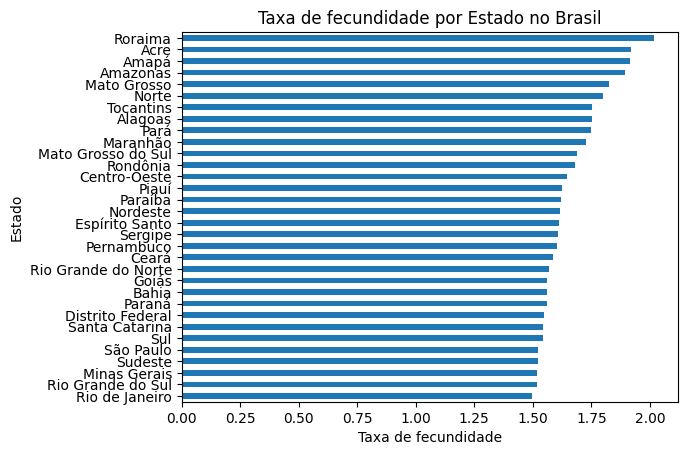

In [28]:
tx_fecundidade.plot(kind='barh', title='Taxa de fecundidade por Estado no Brasil', ylabel='Estado', xlabel='Taxa de fecundidade')

In [29]:
tx_media_brasil=fecundidade_est.get('TX_FCUND_T').mean()
print("A taxa de fecundidade total média no Brasil é de", tx_media_brasil);

A taxa de fecundidade total média no Brasil é de 1.6569936712686568


In [30]:
min_valor = tx_fecundidade.min()  # menor valor da taxa
estado_min = tx_fecundidade[tx_fecundidade == min_valor]  # linha(s) correspondente(s)
estado_min

,TX_FCUND_T
LOCAL,
Rio de Janeiro,1.494884


In [31]:
max_valor = tx_fecundidade.max()  # menor valor da taxa
estado_max = tx_fecundidade[tx_fecundidade == max_valor]  # linha(s) correspondente(s)
estado_max

,TX_FCUND_T
LOCAL,
Roraima,2.017738


A partir dessa análise pode-se concluir que os Estados no Norte possuem maior taxa de fecundidade em geral e os Estados do Sul e Sudeste possuem taxas menores. Além disso, sabemos que o Estado com maior taxa de fecundidade é Roraima e o Estado com menor taxa de fecundidade é o Rio de Janeiro.

##Motivos dos Estados do Norte terem maior taxa de fecundidade e os do Sul/Sudeste menor?
1. Desigualdades socioeconômicas:
Em regiões com menor renda, é comum que famílias tenham mais filhos, por fatores culturais e econômicos (em áreas rurais, por exemplo, filhos podem contribuir com o trabalho). Estados como São Paulo, Rio de Janeiro e Rio Grande do Sul possuem melhores indicadores educacionais, principalmente para mulheres — fator diretamente ligado à redução da fecundidade.

2. Educação e informação:
O acesso a informação sobre planejamento familiar e métodos contraceptivos é mais amplo nas regiões Sul e Sudeste. Mulheres com mais anos de escolaridade geralmente adiam a maternidade e têm menos filhos.

3. Cultura e valores tradicionais:
Em muitos locais do Norte, há maior valorização de famílias numerosas por razões culturais e religiosas. Em áreas urbanas e mais industrializadas (como RJ e SP), os valores culturais tendem a favorecer famílias menores.

4. Acesso a serviços de saúde:
A oferta de serviços públicos de saúde reprodutiva e planejamento familiar é mais ampla e eficaz nos Estados do Sul/Sudeste. No Norte, o acesso pode ser mais limitado, especialmente em áreas rurais ou isoladas da floresta amazônica.

5. Urbanização e custo de vida
O custo de vida mais elevado nas capitais do Sudeste desincentiva famílias grandes. No Norte, onde a urbanização é menor e a vida rural ainda é mais comum, esse fator tem menor peso.

##Vejamos:
Roraima (maior taxa): Menor grau de urbanização, menor escolaridade média, menor acesso a serviços de saúde e predominância de valores tradicionais.

Rio de Janeiro (menor taxa): Alta urbanização, maior escolaridade, custo de vida elevado e maior acesso à informação e saúde reprodutiva.

# Existe diferença entre a expectativa de vida dos homens e das mulheres?
## Houve algum periodo em que a expectavidade devida de ambos caiu drasticamente?

In [32]:
# Agrupar por ano e tirar a média da expectativa de vida para cada grupo
media_fem = indicadores_femininos.groupby('ANO')['ESP_VIDA_O_M'].mean()
media_masc = indicadores_masculinos.groupby('ANO')['ESP_VIDA_O_H'].mean()

# Calcular a diferença
diferenca = media_fem - media_masc
diferenca

,0
ANO,
2000,7.14244
2001,7.182417
2002,7.253937
2003,7.272207
2004,7.251254
...,...
2066,4.662932
2067,4.610104
2068,4.557368


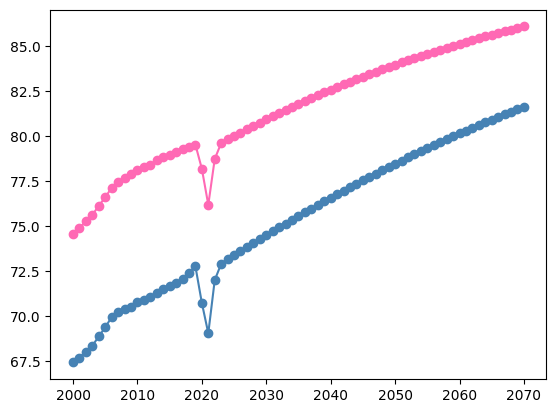

In [33]:
plt.plot(media_fem.index, media_fem.values, label='Mulheres', color='hotpink', marker='o')
plt.plot(media_masc.index, media_masc.values, label='Homens', color='steelblue', marker='o')

Concluimos que existe diferença entre a expectativa de vida dos homens e das mulheres e que a expectativa de vida das mulheres é, em média, maior que a dos homens.

Houve um período em que ambas cairam drasticamente, em 2020. Essa queda na expectativa de vida é um reflexo direto dos impactos da pandemia de COVID-19, que provocou um aumento na mortalidade por várias causas, tanto direta (infecção por coronavírus) quanto indireta (efeitos na saúde mental, interrupção de tratamentos e serviços de saúde). Isso evidencia os efeitos devastadores de uma crise sanitária global e seus efeitos colaterais nas condições de vida e saúde da população.

# Existe correlação entre Taxa de Crescimento Vegetativo e Expectativa de Vida no Brasil?

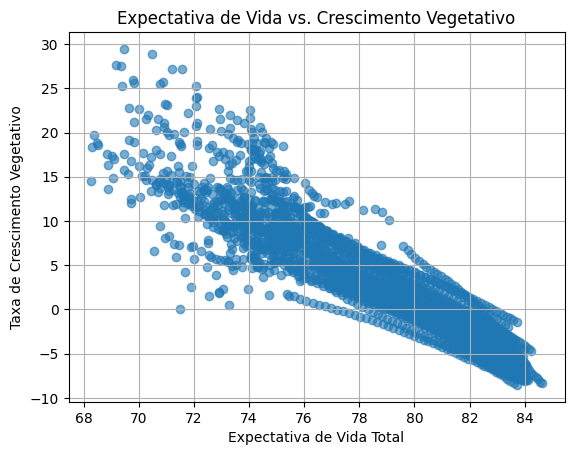

In [34]:
plt.scatter(dados['ESP_VIDA_O_T'], dados['TX_CRESC_VEGET'], alpha=0.6)
plt.title('Expectativa de Vida vs. Crescimento Vegetativo')
plt.xlabel('Expectativa de Vida Total')
plt.ylabel('Taxa de Crescimento Vegetativo')
plt.grid(True)
plt.show()

Com base na análise desses dados, pode-se afirmar que há uma correlação negativa entre a taxa de crescimento vegetativo e a expectativa de vida total no Brasil, principalmente devido a fatores regionais e socioeconômicas. Isso significa que quanto maior a taxa de crescimento vegetativo, menor a expectativa de vida.

# Qual a média de idade total e por Estado no Brasil?

In [35]:
med_idade_total=dados.get('MED_IDADE').mean()
print("A média de idade total no Brasil é de", med_idade_total, "anos")

A média de idade total no Brasil é de 38.17821934097961 anos


In [36]:
med_idade_estado=dados.groupby('LOCAL')['MED_IDADE'].mean()
med_idade_estado=med_idade_estado.drop('Brasil')
print(med_idade_estado)

LOCAL
Acre         35.105303
Alagoas      37.760402
Amapá        34.756839
Amazonas     34.562056
Bahia        39.523262
               ...    
Sergipe      38.593939
Sudeste      40.304998
Sul          39.914806
São Paulo    40.118168
Tocantins    37.173315
Name: MED_IDADE, Length: 32, dtype: object


In [37]:
minimo_idade=med_idade_estado.min()
med_idade_estado[med_idade_estado==minimo_idade]

,MED_IDADE
LOCAL,
Roraima,33.390891


In [38]:
maximo_idade=med_idade_estado.max()
med_idade_estado[med_idade_estado==maximo_idade]

,MED_IDADE
LOCAL,
Rio Grande do Sul,41.268029


O Estado com maior média de idade é o Rio Grande do Sul, cuja taxa de fecundidade é uma das menores do Brasil, e o Estado com menor média de idade é Roraima, que é o que possui maior taxa de fecundidade.

# Como a taxa de mortalidade infantil total varia por Estado no Brasil?
## Quais são os Estados com menor e maior taxa de mortalidade infantil total?

In [39]:
mortalidade_estado=dados.groupby('LOCAL')['TX_MORT_INFANTIL_T'].mean()
mortalidade_estado=mortalidade_estado.drop('Brasil')
mortalidade_estado=mortalidade_estado.sort_values(ascending=True)
print(mortalidade_estado)

LOCAL
Santa Catarina        8.221329
Rio Grande do Sul     8.602553
Sul                   8.759336
Distrito Federal      9.154455
Paraná                9.279289
                       ...    
Acre                 14.469145
Amazonas             14.515834
Sergipe              15.361641
Roraima              15.630303
Amapá                15.862313
Name: TX_MORT_INFANTIL_T, Length: 32, dtype: object


<Axes: title={'center': 'Taxa de mortalidade infantil por Estado no Brasil'}, xlabel='Taxa de mortalidade em milhões', ylabel='Estado'>

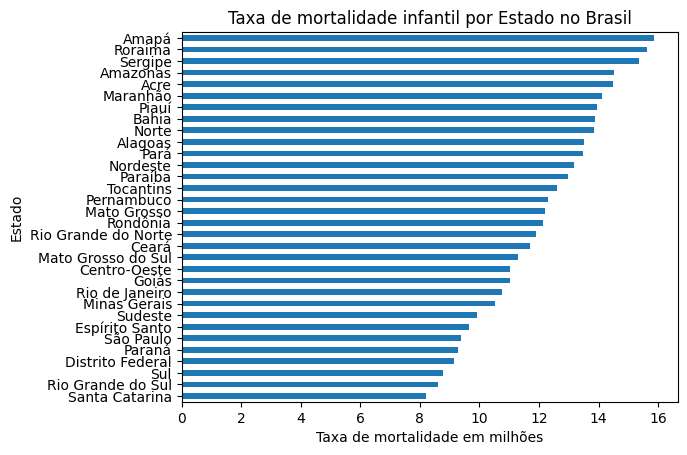

In [40]:
mortalidade_estado.plot(kind='barh', title='Taxa de mortalidade infantil por Estado no Brasil', xlabel='Taxa de mortalidade em milhões',
                        ylabel='Estado')

Os Estados do Norte possuem maior taxa de mortalidade infantil e os Estados do Sul e Sudeste possuem menor taxa de mortalidade infantil, o que podemos ver que se relaciona novamente às desigualdades sociais entre esses Estados brasileiros.

# **PIB Per Capita do Brasil - Variação ao longo dos anos**

<Axes: xlabel='Ano'>

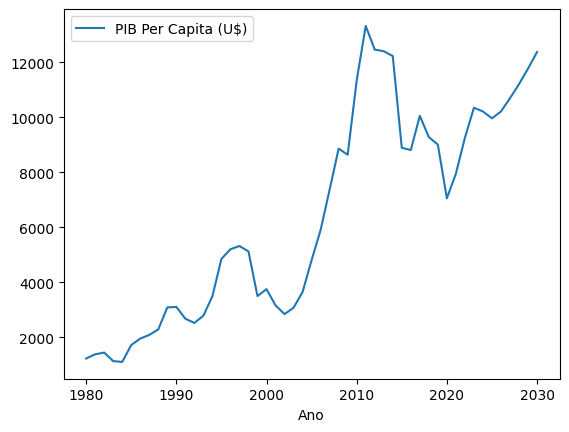

In [41]:
PIB_PC_atualizado=PIB_PC.set_index('Ano')
PIB_PC_atualizado.plot(kind='line')

####PIB oscilando ou em queda: O PIB brasileiro tem mostrado variações significativas ao longo dos anos, especialmente em anos de crise econômica (como em 2015-2016 e 2020 com a pandemia).

# **Há uma relação entre indicadores de saúde (mortalidade, esperança de vida) e o PIB no Brasil?**

###A análise da relação entre indicadores de saúde — como a taxa de mortalidade e a esperança de vida ao nascer — e o crescimento econômico, representado pelo PIB per capita, é fundamental para compreender como o bem-estar populacional afeta o desenvolvimento socioeconômico de um país.

##Hipóteses:
Quanto maior a esperança de vida ao nascer, maior o PIB per capita (indicador relacionado ao crescimento econômico). E quanto menor a taxa de mortalidade, maior o PIB per capita.
*   Famílias e governos investem em saúde como forma de aumentar o bem-estar e a produtividade das pessoas.

A saúde da população está diretamente ligada à capacidade produtiva e ao desenvolvimento sustentável de uma nação. Uma população mais saudável é mais propensa a permanecer ativa por mais tempo, aumentar sua produtividade e contribuir de maneira mais efetiva para a economia.

Além disso, famílias e governos tendem a investir em saúde não apenas por motivos humanitários, mas também como uma estratégia de desenvolvimento econômico. A melhora nos indicadores de saúde reduz custos com doenças, aumenta a escolaridade (ao reduzir ausências escolares e déficits cognitivos associados a doenças infantis) e amplia a força de trabalho disponível e eficiente.


##Expectativas:


*  Uma correlação positiva entre esperança de vida e PIB per capita, indicando que conforme as condições de saúde melhoram, a economia tende a crescer.
*  Uma correlação negativa entre taxas de mortalidade e PIB per capita, sugerindo que ambientes com melhores condições sanitárias e médicas promovem maior desenvolvimento econômico.

# **Esperança de vida ao nascer e PIB per capita**

In [42]:
PIB_filtrado=PIB_PC.loc[(PIB_PC.get('Ano')>=2001) & (PIB_PC.get('Ano')<=2030)]

In [43]:
PIB_filtrado=PIB_filtrado.set_index('Ano')

In [44]:
esp_vida_anos=mortalidade_est.groupby('ANO')['ESP_VIDA_O_T'].mean()
esp_vida_filtrado = esp_vida_anos.loc[(esp_vida_anos.index >= 2001) & (esp_vida_anos.index <= 2030)]

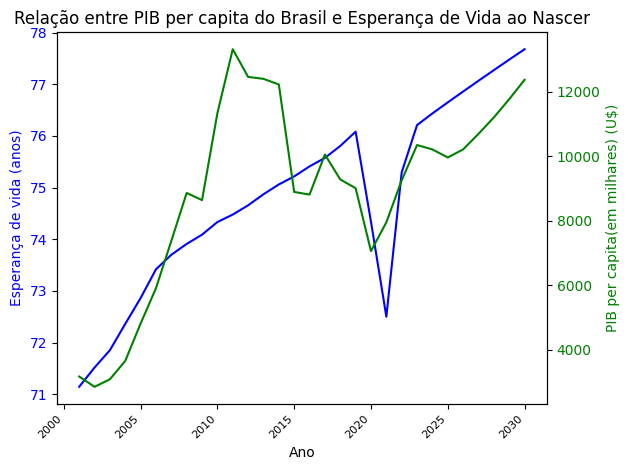

In [45]:
#Criando um gráfico de linha que mostra a variação do PIB e da esperança de vida ao nascer no Brasil

fig, ax1 = plt.subplots()

# Plotar a esperança de vida no eixo Y primário (à esquerda)
ax1.plot(esp_vida_filtrado.index, esp_vida_filtrado.values, color='blue', label='Esperança de vida')
ax1.set_ylabel('Esperança de vida (anos)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o eixo Y secundário (à direita)
ax2 = ax1.twinx()
ax2.plot(PIB_filtrado.index, PIB_filtrado.values, color='green', label='PIB')
ax2.set_ylabel('PIB per capita(em milhares) (U$)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Título e eixo X
plt.title('Relação entre PIB per capita do Brasil e Esperança de Vida ao Nascer')
ax1.set_xlabel('Ano')

# Ajustar diretamente os ticks do eixo X
for label in ax1.get_xticklabels():
    label.set_fontsize(8)      # Tamanho da fonte menor
    label.set_rotation(45)     # Gira os anos
    label.set_ha('right')      # Alinha à direita

plt.tight_layout()
plt.show()

In [46]:
# Fazer o merge no índice de ambos os DataFrames
dados_combinados = pd.merge(PIB_filtrado, esp_vida_filtrado, left_index=True, right_index=True)

Correlação entre PIB Per Capita e Esperança de Vida: 0.78


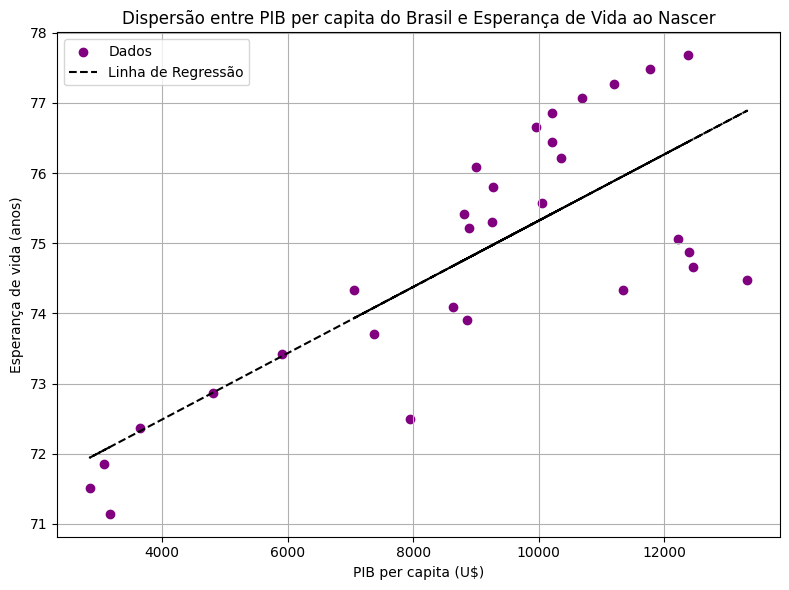

In [47]:
# 1. Converter para numérico (caso tenha valores não numéricos)
dados_combinados['PIB Per Capita (U$)'] = pd.to_numeric(dados_combinados['PIB Per Capita (U$)'], errors='coerce')
dados_combinados['ESP_VIDA_O_T'] = pd.to_numeric(dados_combinados['ESP_VIDA_O_T'], errors='coerce')

# 2. Tratar valores ausentes (remover linhas com NaN)
dados_combinados = dados_combinados.dropna()

# 3. Normalização
dados_combinados['PIB Per Capita (U$) Normalizado'] = (dados_combinados['PIB Per Capita (U$)'] - dados_combinados['PIB Per Capita (U$)'].mean()) / dados_combinados['PIB Per Capita (U$)'].std()
dados_combinados['ESP_VIDA_O_T Normalizado'] = (dados_combinados['ESP_VIDA_O_T'] - dados_combinados['ESP_VIDA_O_T'].mean()) / dados_combinados['ESP_VIDA_O_T'].std()

# Agora calcula a correlação entre as colunas normalizadas
correlacao = dados_combinados['PIB Per Capita (U$) Normalizado'].corr(dados_combinados['ESP_VIDA_O_T Normalizado'])
print(f'Correlação entre PIB Per Capita e Esperança de Vida: {correlacao:.2f}')

# Dados
x = dados_combinados['PIB Per Capita (U$)']
y = dados_combinados['ESP_VIDA_O_T']

# Ajustar modelo linear (y = mx + b)
m, b = np.polyfit(x, y, 1)

# Gráfico
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='purple', label='Dados')

# Plotar linha de regressão
plt.plot(x, m*x + b, color='black', linestyle='--', label='Linha de Regressão')

# Rótulos
plt.xlabel('PIB per capita (U$)')
plt.ylabel('Esperança de vida (anos)')
plt.title('Dispersão entre PIB per capita do Brasil e Esperança de Vida ao Nascer')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Conclusões:

### Há forte correlação positiva (0.78) entre as variáveis, uma vez que os pontos formam uma nuvem inclinada consistentemente para cima.


###O crescimento econômico tem um impacto positivo na qualidade de vida e no aumento da expectativa de vida. No entanto, é importante destacar que outros fatores, como o acesso a serviços de saúde, políticas públicas eficazes e o nível de desigualdade social, também desempenham papéis essenciais nesse processo.

###Podemos observar uma forte correlação positiva entre o PIB per capita e a esperança de vida no Brasil, indicando que, ao longo do tempo, o aumento da renda média da população está associado a uma maior longevidade. No entanto, essa relação não implica causalidade direta, pois fatores socioeconômicos e estruturais também influenciam ambos os indicadores.

#**Taxa de Mortalidade Bruta e PIB per capita**

In [48]:
mortalidade=indices_populacionais.groupby('ANO')['TXB_MORTALID'].mean()


In [49]:
mortalidade_filtrado = mortalidade.loc[(mortalidade.index >= 2001) & (mortalidade.index <= 2030)]

In [50]:
# Fazer o merge no índice de ambos os DataFrames
dados_combinados2 = pd.merge(PIB_filtrado, mortalidade_filtrado, left_index=True, right_index=True)

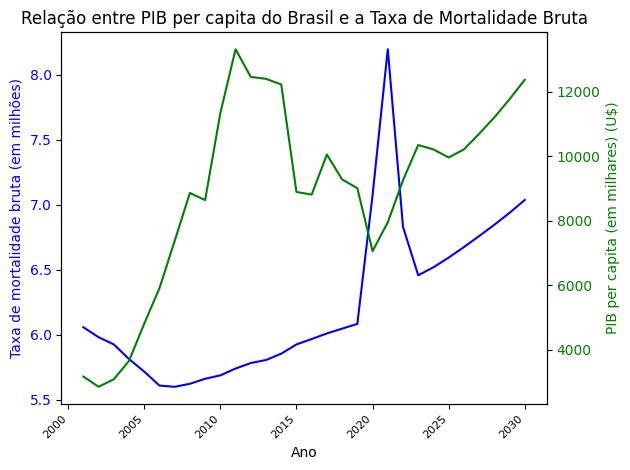

In [51]:
#Criando um gráfico de linha que mostra a variação do PIB e da taxa de mortalidade bruta no Brasil
fig, ax1 = plt.subplots()

# Plotar a taxa de mortalidade no eixo Y primário (à esquerda)
ax1.plot(mortalidade_filtrado.index, mortalidade_filtrado.values, color='blue', label='Esperança de vida')
ax1.set_ylabel('Taxa de mortalidade bruta (em milhões)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o eixo Y secundário (à direita)
ax2 = ax1.twinx()
ax2.plot(PIB_filtrado.index, PIB_filtrado.values, color='green', label='PIB')
ax2.set_ylabel('PIB per capita (em milhares) (U$)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Título e eixo X
plt.title('Relação entre PIB per capita do Brasil e a Taxa de Mortalidade Bruta')
ax1.set_xlabel('Ano')

# Ajustar diretamente os ticks do eixo X
for label in ax1.get_xticklabels():
    label.set_fontsize(8)      # Tamanho da fonte menor
    label.set_rotation(45)     # Gira os anos
    label.set_ha('right')      # Alinha à direita

plt.tight_layout()
plt.show()

Correlação entre PIB Per Capita e Taxa de Mortalidade Bruta: 0.17


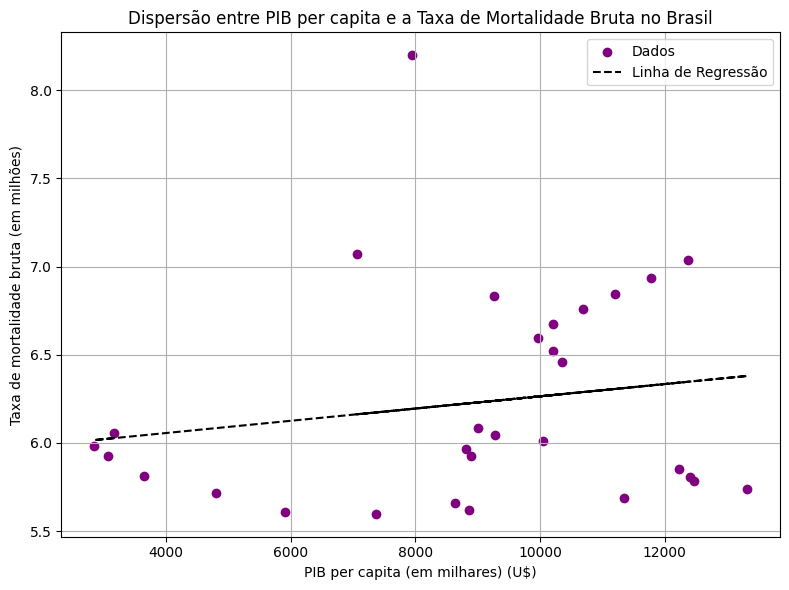

In [52]:
# 1. Converter para numérico (caso tenha valores não numéricos)
dados_combinados2['PIB Per Capita (U$)'] = pd.to_numeric(dados_combinados2['PIB Per Capita (U$)'], errors='coerce')
dados_combinados2['TXB_MORTALID'] = pd.to_numeric(dados_combinados2['TXB_MORTALID'], errors='coerce')

# 2. Tratar valores ausentes (remover linhas com NaN)
dados_combinados2 = dados_combinados2.dropna()

# 3. Normalização
dados_combinados2['PIB Per Capita (U$) Normalizado'] = (dados_combinados2['PIB Per Capita (U$)'] - dados_combinados2['PIB Per Capita (U$)'].mean()) / dados_combinados2['PIB Per Capita (U$)'].std()
dados_combinados2['TXB_MORTALID Normalizado'] = (dados_combinados2['TXB_MORTALID'] - dados_combinados2['TXB_MORTALID'].mean()) / dados_combinados2['TXB_MORTALID'].std()

# Agora calcula a correlação entre as colunas normalizadas
correlacao2 = dados_combinados2['PIB Per Capita (U$) Normalizado'].corr(dados_combinados2['TXB_MORTALID Normalizado'])
print(f'Correlação entre PIB Per Capita e Taxa de Mortalidade Bruta: {correlacao2:.2f}')

# Dados
x2 = dados_combinados2['PIB Per Capita (U$)']
y2 = dados_combinados2['TXB_MORTALID']

# Ajustar modelo linear (y = mx + b)
m, b = np.polyfit(x2, y2, 1)

# Criar o gráfico
plt.figure(figsize=(8, 6))  # Aqui antes de desenhar qualquer gráfico

# Gráfico de dispersão
plt.scatter(x2, y2, color='purple', label='Dados')

# Plotar linha de regressão
plt.plot(x2, m*x2 + b, color='black', linestyle='--', label='Linha de Regressão')

# Rótulos e título
plt.xlabel('PIB per capita (em milhares) (U$)')
plt.ylabel('Taxa de mortalidade bruta (em milhões)')
plt.title('Dispersão entre PIB per capita e a Taxa de Mortalidade Bruta no Brasil')

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


# Conclusões:

### Observa-se uma baixa correlação (0.17) entre as variáveis analisadas. Os pontos do gráfico estão bastante dispersos e não formam uma nuvem de pontos com inclinação negativa, como sugerido inicialmente pela hipótese.

###A relação entre PIB per capita e taxa de mortalidade no Brasil não é linear nem direta. A baixa correlação observada indica que, embora o crescimento econômico possa ter um impacto positivo na qualidade de vida e na diminuição/aumento da taxa de mortalidade, outros fatores, como acesso a cuidados médicos, políticas públicas de saúde e desigualdade social, desempenham papéis fundamentais. Há anos em que o PIB per capita oscila (por exemplo, durante crises econômicas), mas a taxa de mortalidade não necessariamente segue o mesmo padrão.

###Podemos concluir que a taxa de mortalidade é influenciada por uma série de fatores sociais, sanitários, ambientais e políticos, e não depende exclusivamente do crescimento econômico. Pode acontecer de ela aumentar mesmo com aumento no PIB per capita, como observamos.

###Já em relação ao PIB, que é uma variável econômica complexa, também não se pode atribuir sua oscilação apenas à saúde ou bem-estar da população, da mesma forma que o bem-estar não depende exclusivamente do crescimento econômico.

#**Fecundidade, Renda e Consumo**

<h2>Evolução da renda média no Brasil segmentada por raça e gênero</h2>
<i>O gráfico a seguir apresenta a evolução da renda média no Brasil, mas não permite identificar simultaneamente o pertencimento racial e de gênero. Ainda assim, as discrepâncias salariais observadas entre grupos indicam desigualdades estruturais relevantes</i>

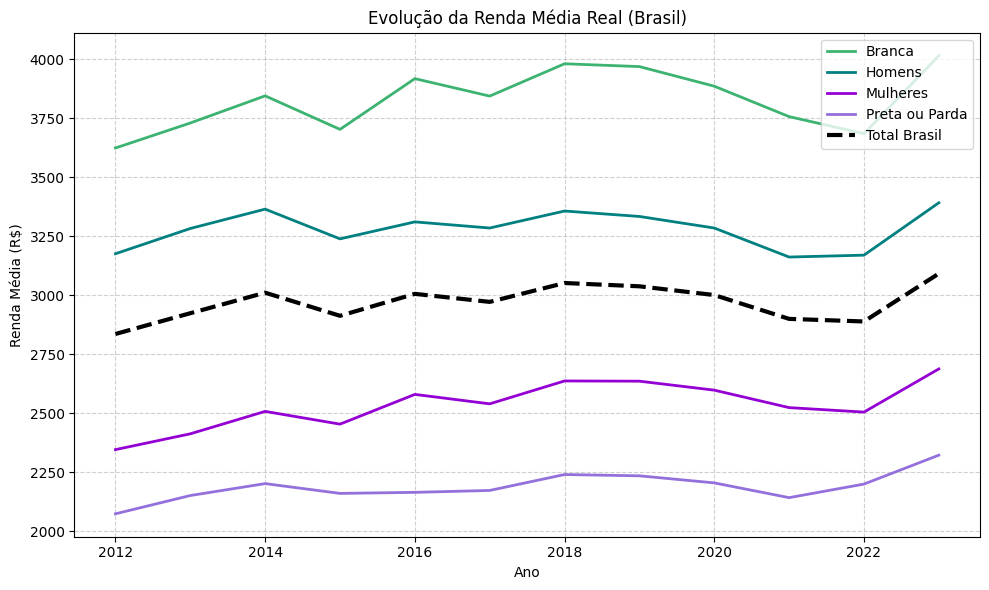

In [53]:
anos = RendaMedia_Mulher.columns.astype(int)

plt.figure(figsize=(10, 6))
plt.plot(anos, RendaMedia_Branca.T, label='Branca', linewidth=2,  color ='mediumseagreen')
plt.plot(anos, RendaMedia_Homem.T, label='Homens', linewidth=2 , color = 'teal')
plt.plot(anos, RendaMedia_Mulher.T, label='Mulheres', linewidth=2, color = 'darkviolet')
plt.plot(anos, RendaMedia_Negra.T, label='Preta ou Parda', linewidth=2, color='mediumpurple')
plt.plot(anos, RendaMedia_Brasil.T, label='Total Brasil', linewidth=3, linestyle='--', color='black')

plt.title('Evolução da Renda Média Real (Brasil)')
plt.xlabel('Ano')
plt.ylabel('Renda Média (R$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Os dados evidenciam <b>discrepâncias salariais significativas</b> entre os grupos, revelando que fatores estruturais continuam a influenciar fortemente o acesso à renda. </br>
<i>Embora o recorte racial também seja relevante para a análise da fecundidade no Brasil, a indisponibilidade de dados dpor gênero e raça impede uma investigação mais aprofundada.</i>

<h2>Relação entre a renda média e a taxa de fecundidade</h2>
Embora a renda média tenha se mantido relativamente estável entre 2012 e 2023, a taxa de fecundidade apresentou variações significativas no mesmo período. Há correlação entre a decisão reprodutiva e a renda média?

In [54]:
#Data Frames
renda_mulher = RendaMedia_Mulher.T.reset_index().iloc[:, 1].astype(float)
renda_homem = RendaMedia_Homem.T.reset_index().iloc[:, 1].astype(float)
fec = txFecunidade_ano.T.reset_index().iloc[:, 1].astype(float)

#Normalizando variaveis
fec_normalizado = (fec - fec.mean()) / fec.std()
renda_normalizado = (renda_mulher - renda_mulher.mean()) / renda_mulher.std()

#Correlacao Renda Média Feminina e Taxa de Fecundiade
correlacao = fec_normalizado.corr(renda_normalizado)
print(f'Correlação entre renda média das mulheres e taxa de fecundidade: {correlacao:.2f}')

#Correlacao Renda Média e Taxa de Fecundiade
correlacao_g = fec_normalizado.corr((renda_homem - renda_homem.mean()) / renda_homem.std())
print(f'Correlação entre renda média dos Homens e taxa de fecundidade: {correlacao_g:.2f}')

Correlação entre renda média das mulheres e taxa de fecundidade: -0.39
Correlação entre renda média dos Homens e taxa de fecundidade: 0.16


A renda média feminina apresenta a maior correlação absoluta com a taxa de fecundidade. Essa relação negativa sugere que, <b>conforme a renda das mulheres aumenta, a fecundidade tende a diminuir.</b> Esse fenômeno pode ser explicado por diversos fatores econômicos e sociais, como o aumento do custo de oportunidade da maternidade e as mudanças nas prioridades pessoais associadas a níveis mais altos de renda.</br>
O gráfico a seguir apresenta a dispersão entre a taxa de fecundidade e a renda média feminina.

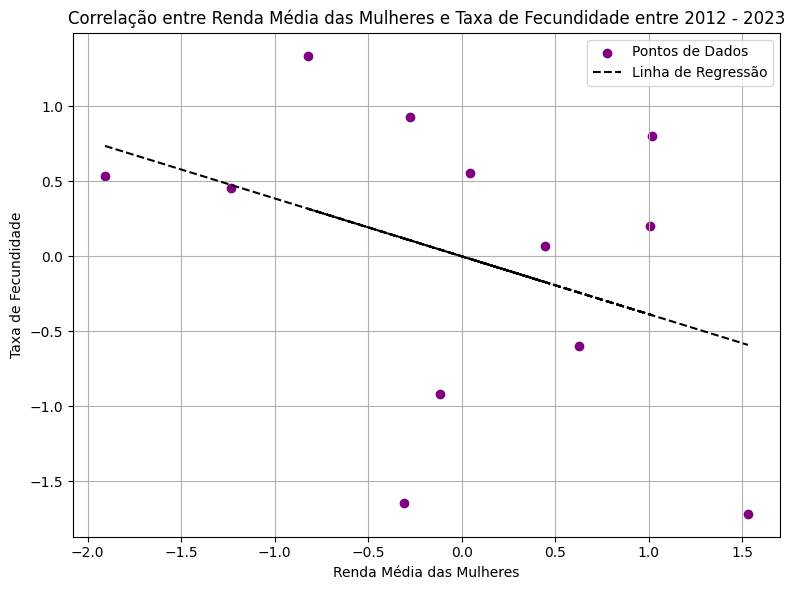

In [55]:
m, b = np.polyfit(renda_normalizado, fec_normalizado, 1)

plt.figure(figsize=(8, 6))
plt.scatter(renda_normalizado, fec_normalizado, color='purple', label='Pontos de Dados')
plt.plot(renda_normalizado, m*renda_normalizado + b, color='black', linestyle='--', label='Linha de Regressão')

plt.xlabel('Renda Média das Mulheres')
plt.ylabel('Taxa de Fecundidade')
plt.title('Correlação entre Renda Média das Mulheres e Taxa de Fecundidade entre 2012 - 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h2>Um recorte por Classes de Renda</h2>
Diversos estudos apontam uma relação entre nível de renda e comportamento reprodutivo. Mulheres em situação de maior vulnerabilidade econômica tendem a ter mais filhos, o que pode estar ligado a fatores como ausência de políticas de planejamento familiar e participação limitada no mercado de trabalho.
Em contrapartida, mulheres com maior renda costumam ter menos filhos ou adiar a maternidade, influenciadas por maior autonomia financeira, acesso à informação e outras prioridades profissionais.

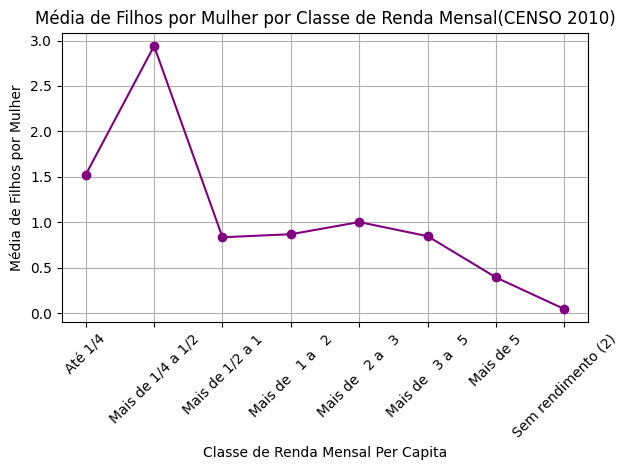

In [56]:
df_rf = renda_mulher_filhos_censo10.set_index("classes de rendimento mensal domiciliar pc(salário mínimo)").iloc[1:, 1:]
filhoPmulher = df_rf.T.sum().reset_index().iloc[:,1] / MulherRenda.T.reset_index().iloc[:,1]

plt.plot(MulherRenda.columns, filhoPmulher, marker='o', linestyle='-', color='purple')
plt.xlabel('Classe de Renda Mensal Per Capita')
plt.ylabel('Média de Filhos por Mulher')
plt.title('Média de Filhos por Mulher por Classe de Renda Mensal(CENSO 2010)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Há um padrão inversamente relacionado entre renda e número de filhos. Mulheres com menores rendimentos tiveream em média, mais filhos do que aquelas com rendimentos mais elevados.

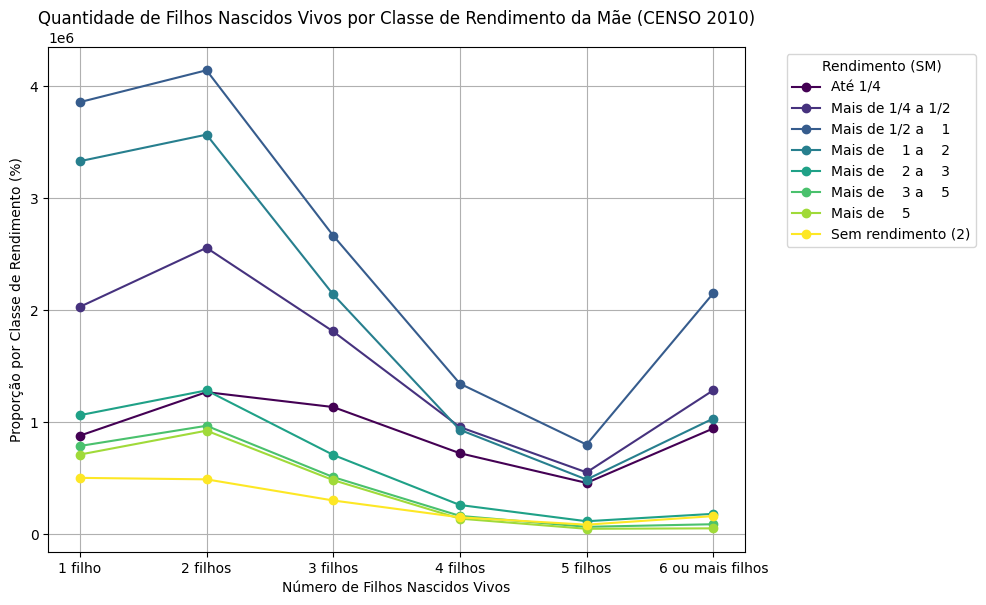

In [57]:
# Transforma a tabela para que o índice seja a quantidade de filhos
df_rf = renda_mulher_filhos_censo10.set_index("classes de rendimento mensal domiciliar pc(salário mínimo)").iloc[1:, 1:]

# Transpõe para ter a quantidade de filhos no eixo X
df_rf.T.plot(kind='line', marker='o', figsize=(10,6), colormap='viridis')

plt.title('Quantidade de Filhos Nascidos Vivos por Classe de Rendimento da Mãe (CENSO 2010)')
plt.xlabel('Número de Filhos Nascidos Vivos')
plt.ylabel('Proporção por Classe de Rendimento (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Rendimento (SM)')
plt.grid(True)
plt.tight_layout()
plt.show()


<h2>IPCA e Fecundidade</h2>
O IPCA é o principal indicador da inflação no país, e sua variação reflete o quanto o custo de vida das famílias brasileiras tem se elevado. Partindo da hipótese de que o encarecimento dos bens e serviços pode impactar as decisões reprodutivas.</br>
O gráfico a seguir mostra os indices de IPCA acumulado e as taxa de fecundidade no decorrer dos anos

In [58]:
ano = 2012
cabecalho = 2014
i = 0  # ou outro valor inicial apropriado
ipca_historico_acnumAno = pd.DataFrame()

for j in range(1,13):  # para 9 anos
    if(cabecalho == ano):
        i+= 8
        cabecalho+= 5

    df_line = pd.read_csv('https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/Anny-arquivos/ipca_202503SerieHist.csv', skiprows=276 + i, nrows=1, usecols=[1, 6])
    ipca_historico_acnumAno.loc[0, ano] = df_line.iloc[0, 1]

    i += 13  # ou quanto precisar pular para chegar no próximo ano
    ano += 1

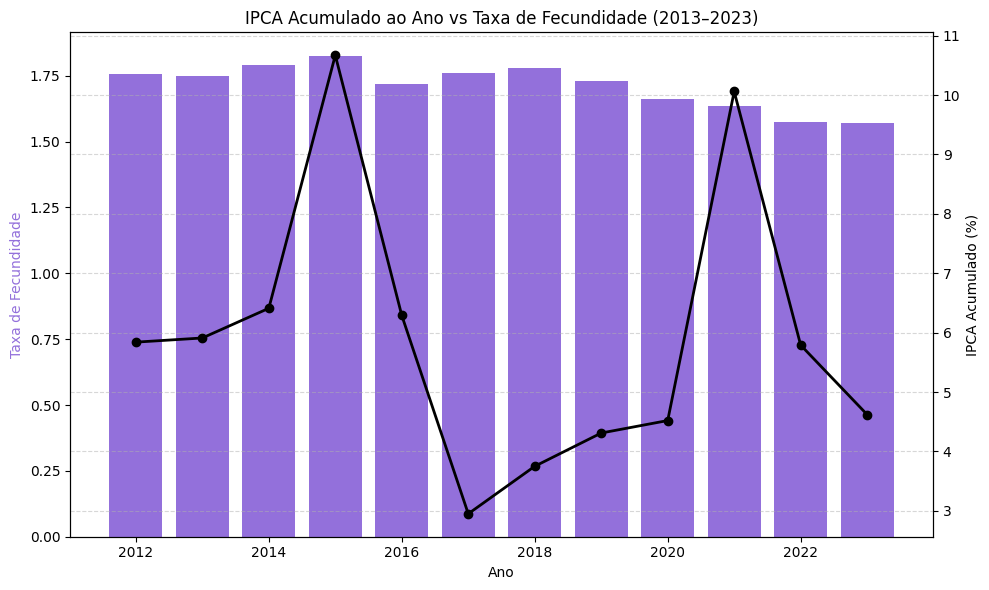

In [59]:
# Usando os dados originais (não normalizados)
ipca = ipca_historico_acnumAno.T.iloc[:, 0].astype(float)
fec = txFecunidade_ano.iloc[0, :].astype(float)
anos = fec.index.astype(int)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Eixo Y da esquerda: Taxa de Fecundidade
ax1.bar(anos, fec, color='mediumpurple', label='Taxa de Fecundidade')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Taxa de Fecundidade', color='mediumpurple')
ax1.tick_params(axis='y', labelcolor='black')

# Eixo Y da direita: IPCA Acumulado
ax2 = ax1.twinx()
ax2.plot(anos, ipca, color='black', marker='o', linewidth=2, label='IPCA Acumulado')
ax2.set_ylabel('IPCA Acumulado (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Título e layout
plt.title('IPCA Acumulado ao Ano vs Taxa de Fecundidade (2013–2023)')
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [60]:
ipca_historico = ipca_historico_acnumAno.T.iloc[:, 0]
media_ipca = ipca_historico.mean()
desvio_ipca = ipca_historico.std()

# Z-score
z_scores_ipca = (ipca_historico - media_ipca) / desvio_ipca

# Considerar outlier se z > 1.5 ou z < -1.5
outliers_ipca = ipca_historico[np.abs(z_scores_ipca) > 1.5]

<i>Na análise da correlação, os anos de 2015 e 2021 foram removidos pois foram identificados como outliers. Esses anos apresentaram valores atípicos de IPCA o que poderia distorcer a análise geral.</i></br>
<b>2015:</b> Crise econômica mais profunda no Brasil, o que resultou em uma inflação excepcionalmente alta naquele ano. Isso causou um aumento nos preços de diversos bens e serviços, sem que o padrão de variação dos anos anteriores fosse mantido.
</br>
<b>2021:</b> A pandemia de COVID-19 afetou fortemente a economia global, impactando diretamente os preços de serviços e bens essenciais como alimentos e combustíveis.

Correlação entre ipca acumulado por ano e taxa de fecundidade: -0.03514455515379846


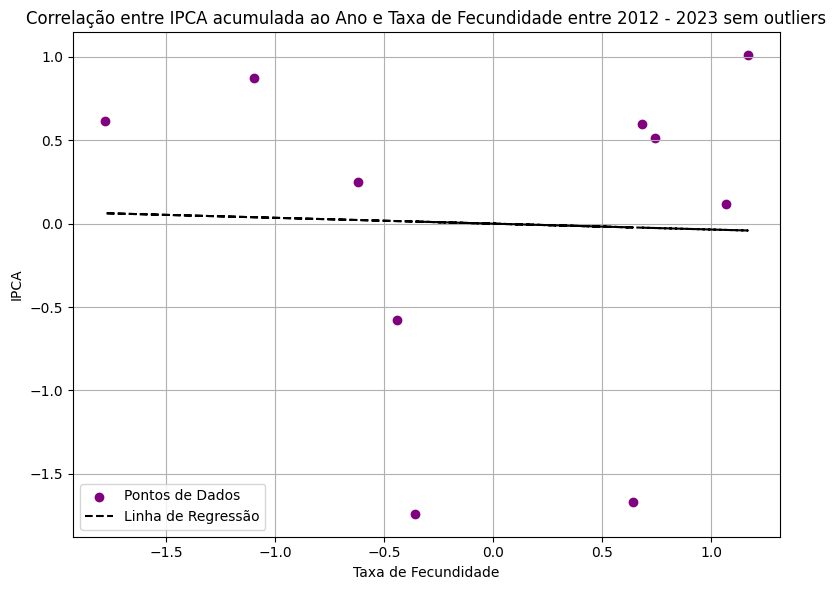

In [61]:
ipca_historico = ipca_historico_acnumAno.T.drop([2015,2021]).reset_index().iloc[:, 1].astype(float)
fec = txFecunidade_ano.T.drop([2015,2021]).reset_index().iloc[:, 1].astype(float)

fec_normalizado = (fec - fec.mean()) / fec.std()
ipca_normalizado = (ipca_historico - ipca_historico.mean()) / ipca_historico.std()

correlacao = fec_normalizado.corr(ipca_normalizado)
print(f'Correlação entre ipca acumulado por ano e taxa de fecundidade: {correlacao}')

m, b = np.polyfit(ipca_normalizado, fec_normalizado, 1)

plt.figure(figsize=(8, 6))
plt.scatter(ipca_normalizado, fec_normalizado, color='purple', label='Pontos de Dados')
plt.plot(ipca_normalizado, m*ipca_normalizado + b, color='black', linestyle='--', label='Linha de Regressão')

plt.xlabel('Taxa de Fecundidade')
plt.ylabel('IPCA')
plt.title('Correlação entre IPCA acumulada ao Ano e Taxa de Fecundidade entre 2012 - 2023 sem outliers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A <b>baixa correlação entre o IPCA geral acumulado ao ano e a taxa de fecundidade</b> pode está relacionada ao fato que há uma diversidade de fatores que influenciam a decisão reprodutiva, além da variação dos preços.

<h2>Poder de Compra e Fecundidade</h2>
$Poder_Compra = Valor * ( 1 + inflação)$
</br>
O poder de compra reflete a capacidade de consumo das famílias e o acesso a bens e serviços, que são variáveis que podem influenciar diretamente as decisões de ter filhos.

In [62]:
ipca_historico = ipca_historico_acnumAno.T
RendaMedia = RendaMedia_Brasil
SalarioMinimo = pd.DataFrame()
SalarioMinimo.index = RendaMedia_Brasil.T.index
SalarioMinimo[0]=[622 , 678, 724, 788, 880, 937, 954, 998, 1045, 1100, 1212, 1320]
poder_compra_sm = SalarioMinimo.reset_index().iloc[:, 1] / (1 + ipca_historico_acnumAno.T.reset_index().iloc[:, 1])
poder_compra_sm.index = ipca_historico_acnumAno.T.index

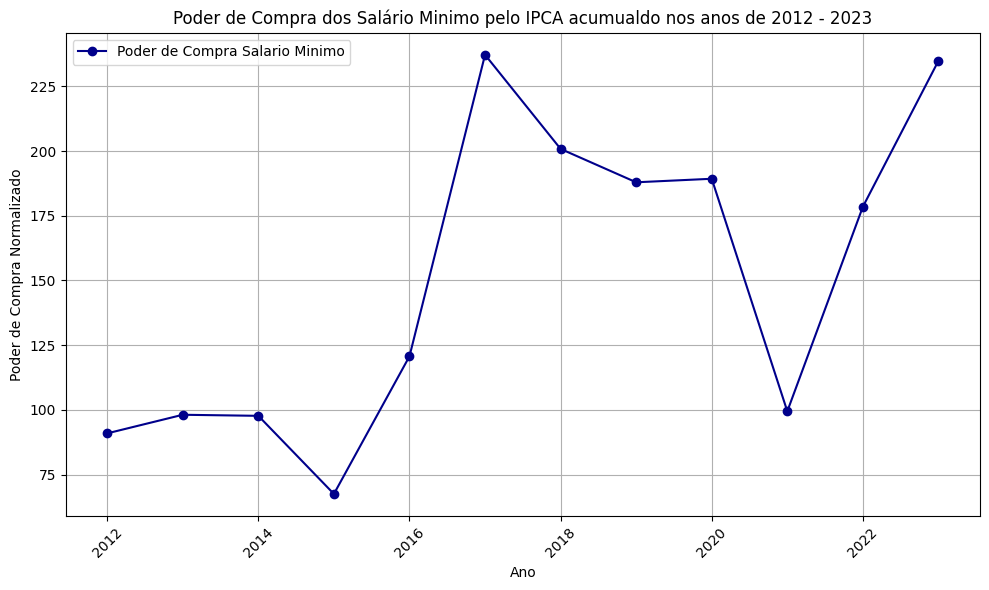

In [63]:
# Plotando ambas as linhas no mesmo gráfico
plt.figure(figsize=(10, 6))
plt.plot(poder_compra_sm.index, poder_compra_sm.values, marker='o', linestyle='-', label='Poder de Compra Salario Minimo', color='darkblue')

# Personalização
plt.xlabel('Ano')
plt.ylabel('Poder de Compra Normalizado')
plt.title('Poder de Compra dos Salário Minimo pelo IPCA acumualdo nos anos de 2012 - 2023')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Ao longo dos anos, é possível perceber que o <b>poder de compra  tende a apresentar uma relação inversamente proporcional ao IPCA</b>. Isso significa que, à medida que o IPCA sobe e o custo de vida aumenta, o poder de compra do trabalhador diminui, uma vez que os salários não acompanham o ritmo de aumento dos preços.

Correlação entre poder de compra e taxa de fecundidade: -0.4342078400275084


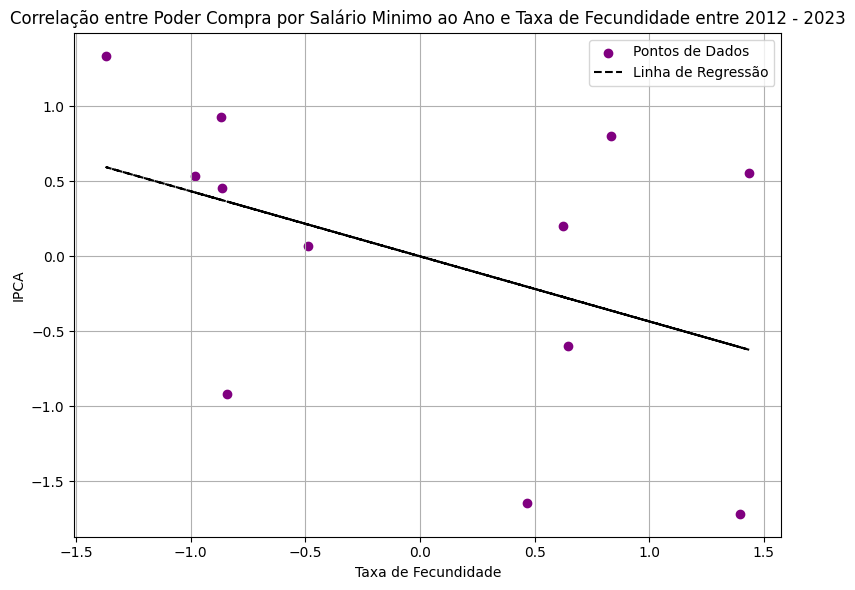

In [64]:
fec =txFecunidade_ano.T.iloc[:,0].astype(float)

fec_normalizado = (fec - fec.mean()) / fec.std()
compra_normalizado = (poder_compra_sm - poder_compra_sm.mean()) / poder_compra_sm.std()

correlacao = fec_normalizado.corr(compra_normalizado)
print(f'Correlação entre poder de compra e taxa de fecundidade: {correlacao}')

m, b = np.polyfit(compra_normalizado, fec_normalizado, 1)

plt.figure(figsize=(8, 6))
plt.scatter(compra_normalizado, fec_normalizado, color='purple', label='Pontos de Dados')
plt.plot(compra_normalizado, m*compra_normalizado + b, color='black', linestyle='--', label='Linha de Regressão')

plt.xlabel('Taxa de Fecundidade')
plt.ylabel('IPCA')
plt.title('Correlação entre Poder Compra por Salário Minimo ao Ano e Taxa de Fecundidade entre 2012 - 2023')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<li>Á medida que o <b>poder de compra diminui, a taxa de fecundidade tende a aumentar.</b> Ou seja, quando o poder de compra cai, as famílias podem estar mais propensas a ter mais filhos.</li>
<li> A <b>correlação de -0,43 indica uma relação moderada.</b>b> Ou seja, há uma tendência clara de que a redução no poder de compra está relacionada a um aumento na taxa de fecundidade.</li>

<h2>Conclusão</h2>
A análise mostra que quanto piores as condições econômicas das mulheres, maior tende a ser a taxa de fecundidade. A renda média feminina tem maior correlação negativa com a fecundidade do que a masculina, indicando que o custo da maternidade afeta especialmente as mulheres. Além disso, mulheres de baixa renda têm, em média, mais filhos do que as de alta renda. Por fim, a inflação e a perda do poder de compra também se associam à queda da fecundidade, mostrando que fatores econômicos mais amplos impactam diretamente nas decisões de ter filhos.

#**O envelhecimento populacional afeta a estrutura de mercado (por exemplo, demanda por saúde)?**

### Visto que a taxa de fecundidade no território brasileiro vem diminuindo, convém pensarmos quais tem sido os impactos disso no consumo da população. Nesse sentido, uma vez que é natural que pessoas mais idosas venham a necessitar de mais medicamentos, é válido avaliar essa relação.

###Hipóteses:


* Ao longo dos anos, com a dimunuição da taxa de fecundidade, ou seja, com o envelhecimento da população, os gastos das famílias com produtos farmacêuticos (remédios) têm aumentado.

O envelhecimento populacional, com o aumento da esperança de vida e diminuição da taxa de fecundidade, gera um aumento na demanda por serviços de saúde e, consequentemente, nos gastos com saúde. Isso se deve ao fato de que as pessoas idosas tendem a ter mais doenças crônicas e a necessitar de mais cuidados médicos

###Expectativas

* Espera-se observar um aumento contínuo na proporção de idosos (60+ e 65+) ao longo do tempo, acompanhado por uma queda nas taxas de fecundidade e natalidade.

* Espera-se que o consumo aparente de produtos farmacêuticos aumente à medida que a população envelhece, ou seja, que haja uma correlação positiva entre essas medidas.

##**Proporção de idosos ao longo dos anos**

In [65]:
pop_idosa_brasil = dados[dados['LOCAL'] == 'Brasil']
pop_idosa_brasil =  pop_idosa_brasil[(pop_idosa_brasil["ANO"] > 1999) & (pop_idosa_brasil["ANO"] < 2025)]

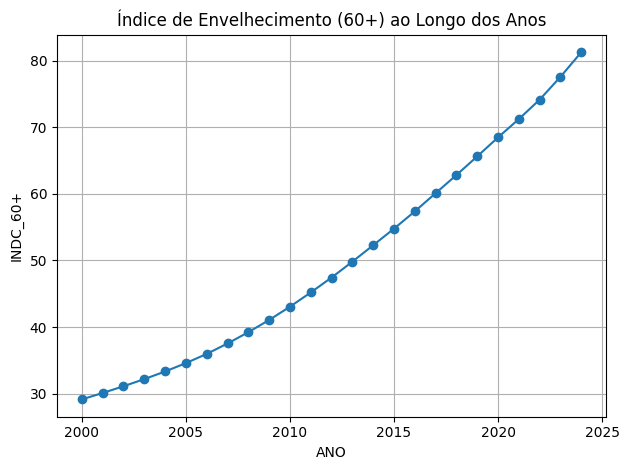

In [66]:
plt.plot(pop_idosa_brasil['ANO'], pop_idosa_brasil['INDC_60+'], marker='o', linestyle='-')
plt.title('Índice de Envelhecimento (60+) ao Longo dos Anos')
plt.xlabel('ANO')
plt.ylabel('INDC_60+')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Evolução da taxa de fecundidade'}, xlabel='ANO', ylabel='Média em milhões'>

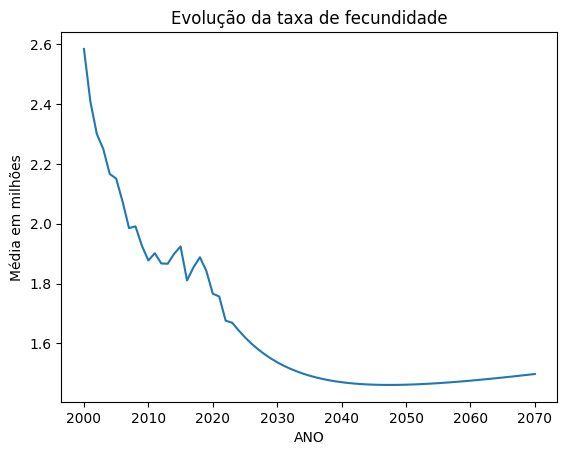

In [67]:
tx_fecundidade=fecundidade_est.groupby('ANO')['TX_FCUND_T'].mean()
tx_fecundidade.plot(kind="line", ylabel='Média em milhões', title='Evolução da taxa de fecundidade')

###Através dos gráficos plotados, notamos que a população esta realmente envelhecendo, dado que o índice de envelhecimento está aumentando e a taxa de fecundidade está diminuindo.

##**Consumo de produtos farmoquímicos e farmacêuticos ao longo dos anos**

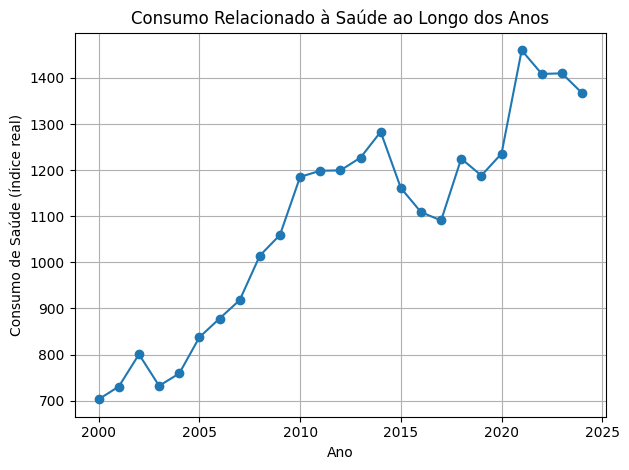

In [68]:
plt.plot(dados_saude['Ano'], dados_saude['Consumo relacionado a saúde'], marker='o', linestyle='-')
plt.title('Consumo Relacionado à Saúde ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Consumo de Saúde (índice real)')
plt.grid(True)
plt.tight_layout()
plt.show()

###Observa-se que há uma tendência de crescimento no consumo ao longo do tempo, o que é esperado diante do envelhecimento populacional, avanços na medicina e aumento da demanda por produtos farmacêuticos. O consumo quase dobrou entre 2000 e 2024, o que mostra uma alta expressiva.



##**Correlação entre o índice de envelhecimento populacional e o consumo de produtos relacionados a saúde:**

###Para isso, vamos iniciar juntando em um mesmo df, as informações acerca do Índice de envelhecimento e os dados de custos com a saúde.

In [69]:
pop_idosa_brasil = pop_idosa_brasil[['ANO', 'INDC_60+']]
pop_idosa_brasil = pop_idosa_brasil.rename(columns={'ANO': 'Ano', 'INDC_60+': 'Indice_Envelhecimento'})
tx_fecundidade = tx_fecundidade.reset_index().rename(columns={'ANO': 'Ano', 'TX_FCUND_T': 'Taxa_Fecundidade'})
dados_saude = dados_saude.rename(columns={'Consumo relacionado a saúde': 'Consumo_Saude'})

In [70]:
idosos_saude = pop_idosa_brasil.merge(dados_saude, on='Ano')
idosos_saude

,Ano,Indice_Envelhecimento,Consumo_Saude
0,2000,29.142644,702.98
1,2001,30.101231,730.68
2,2002,31.113308,800.49
3,2003,32.181739,732.17
4,2004,33.328869,759.00
...,...,...,...
20,2020,68.463863,1235.79
21,2021,71.212903,1459.98
22,2022,74.130528,1408.71
23,2023,77.555159,1409.95


Correlação entre consumo de saúde e índice de envelhecimento: 0.89


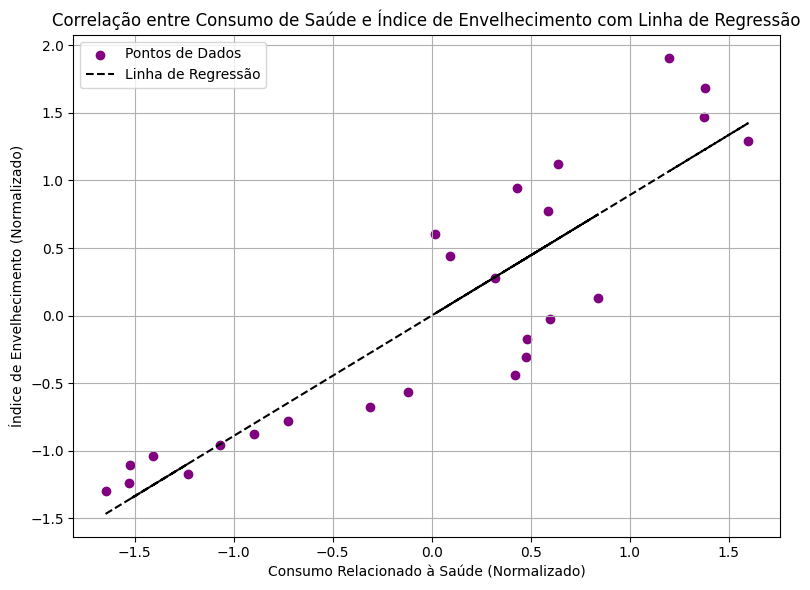

In [71]:
# 1. Converter para numérico (caso tenha valores não numéricos)
idosos_saude['Consumo_Saude'] = pd.to_numeric(idosos_saude['Consumo_Saude'], errors='coerce')
idosos_saude['Indice_Envelhecimento'] = pd.to_numeric(idosos_saude['Indice_Envelhecimento'], errors='coerce')

# 2. Tratar valores ausentes (remover linhas com NaN)
idosos_saude = idosos_saude.dropna(subset=['Consumo_Saude', 'Indice_Envelhecimento'])

# 3. Normalização
idosos_saude['Consumo_Saude_normalizado'] = (idosos_saude['Consumo_Saude'] - idosos_saude['Consumo_Saude'].mean()) / idosos_saude['Consumo_Saude'].std()
idosos_saude['Indice_Envelhecimento_normalizado'] = (idosos_saude['Indice_Envelhecimento'] - idosos_saude['Indice_Envelhecimento'].mean()) / idosos_saude['Indice_Envelhecimento'].std()

# 4. Calcular a correlação
correlacao = idosos_saude['Consumo_Saude_normalizado'].corr(idosos_saude['Indice_Envelhecimento_normalizado'])
print(f'Correlação entre consumo de saúde e índice de envelhecimento: {correlacao:.2f}')

# 5. Calcular a linha de regressão (modelo linear)
import numpy as np
x = idosos_saude['Consumo_Saude_normalizado']
y = idosos_saude['Indice_Envelhecimento_normalizado']

# Ajustando a reta (y = mx + b)
m, b = np.polyfit(x, y, 1)

# Plotando o gráfico de dispersão e a linha de regressão
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='purple', label='Pontos de Dados')

# Plotando a linha de regressão
plt.plot(x, m*x + b, color='black', linestyle='--', label='Linha de Regressão')

# Rótulos e título
plt.xlabel('Consumo Relacionado à Saúde (Normalizado)')
plt.ylabel('Índice de Envelhecimento (Normalizado)')
plt.title('Correlação entre Consumo de Saúde e Índice de Envelhecimento com Linha de Regressão')
plt.legend()

# Exibindo o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


###O gráfico de dispersão acima, entre o índice de envelhecimento e o consumo de saúde, apresentou uma correlação forte e positiva (0,89), mostrando que há uma tendência de que o consumo de produtos e serviços de saúde aumente com o envelhecimento populacional, reforçando nossa hipótese inicial.

##**Correlação entre a Taxa de Fecundidade e o consumo de produtos relacionados a saúde:**

###De maneira análoga a que foi realizada na correlçao acima, iniciamos criando um df com os daos que são relevantes e depois disso faremos a correlçao entre a Taxa de Fecundidade e o Comsumo relacionado à saúde

In [72]:
fecundidade_saude = dados_saude.merge(tx_fecundidade, on='Ano')
fecundidade_saude

,Ano,Consumo_Saude,Taxa_Fecundidade
0,2000,702.98,2.583778
1,2001,730.68,2.407636
2,2002,800.49,2.299553
3,2003,732.17,2.249456
4,2004,759.00,2.166186
...,...,...,...
20,2020,1235.79,1.766187
21,2021,1459.98,1.75689
22,2022,1408.71,1.675808
23,2023,1409.95,1.669305


Correlação entre Taxa de Fecundidade e Consumo de Saúde (normalizados): -0.92


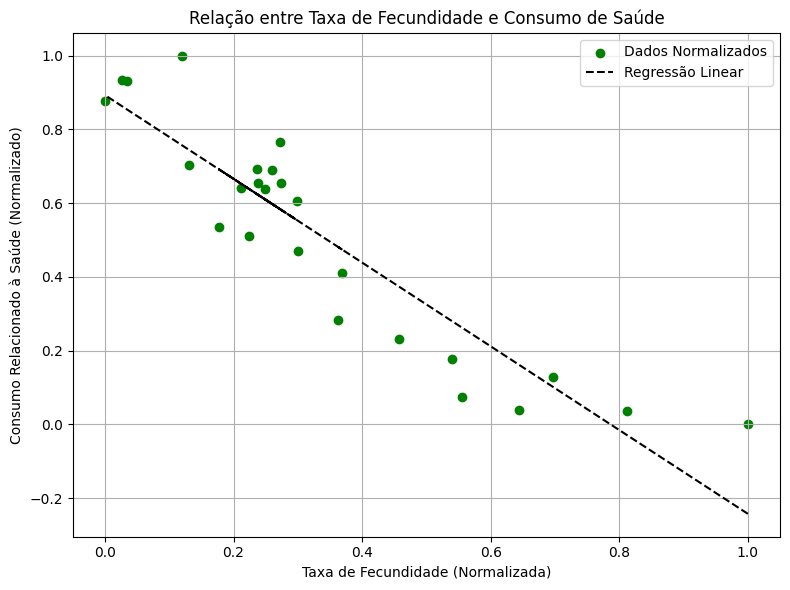

In [73]:
fecundidade_saude['Taxa_Fecundidade'] = pd.to_numeric(fecundidade_saude['Taxa_Fecundidade'], errors='coerce')
fecundidade_saude['Consumo_Saude'] = pd.to_numeric(fecundidade_saude['Consumo_Saude'], errors='coerce')

fecundidade_saude = fecundidade_saude.dropna(subset=['Taxa_Fecundidade', 'Consumo_Saude'])

x = fecundidade_saude['Taxa_Fecundidade']
y = fecundidade_saude['Consumo_Saude']

x_norm = (x - x.min()) / (x.max() - x.min())
y_norm = (y - y.min()) / (y.max() - y.min())

correlacao = x_norm.corr(y_norm)
print(f'Correlação entre Taxa de Fecundidade e Consumo de Saúde (normalizados): {correlacao:.2f}')

coef = np.polyfit(x_norm, y_norm, 1)
reta = np.poly1d(coef)

plt.figure(figsize=(8, 6))
plt.scatter(x_norm, y_norm, color='green', label='Dados Normalizados')
plt.plot(x_norm, reta(x_norm), color='black', linestyle='--', label='Regressão Linear')

plt.xlabel('Taxa de Fecundidade (Normalizada)')
plt.ylabel('Consumo Relacionado à Saúde (Normalizado)')
plt.title('Relação entre Taxa de Fecundidade e Consumo de Saúde')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###A correlação encontrada (-0,92) indica uma relação negativa muito forte entre a Taxa de Fecundidade e o Consumo Relacionado à Saúde. Esse resultado complementa a análise anterior, pois sugere que, à medida que a taxa de fecundidade diminui, o consumo de medicamentos aumenta — evidenciando que uma população em processo de envelhecimento tende a demandar mais produtos e serviços voltados à saúde.



##**Conclusão:**

###Os resultados obtidos ao longo da análise confirmam as hipóteses levantadas. Observou-se, de fato, uma queda contínua na taxa de fecundidade no Brasil, refletindo um processo de envelhecimento populacional. Paralelamente, verificou-se um aumento consistente no consumo relacionado à saúde, especialmente de produtos farmacêuticos.
###Esses dados evidenciam que o envelhecimento populacional altera significativamente a estrutura de mercado, em especial no setor de saúde. O aumento da proporção de idosos implica um crescimento na demanda por produtos e serviços voltados ao cuidado com a saúde, o que pode pressionar políticas públicas e o próprio sistema de saúde a se adaptarem para atender a esse novo perfil demográfico.